# import

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import cm

import os
from collections import OrderedDict
from adjustText import adjust_text

%matplotlib inline
%config InlineBackend.figure_format='svg'
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Times New Roman' #'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

In [2]:
from astropy.time import Time
from astropy.time import TimeYearDayTime
from datetime import datetime
from time import strftime,strptime
import calendar
from dateutil.parser import parse

In [3]:
import numpy as np
import pandas as pd
import os
from astropy.table import Table

In [4]:
from scipy.stats import spearmanr#
from scipy.stats.stats import pearsonr

In [5]:
from astropy.cosmology import FlatLambdaCDM,Planck13,Planck15,z_at_value
from astropy import units as u
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.27, Ode0=0.73)
#cosmo=FlatLambdaCDM(H0=73,Om0=0.3)

In [6]:
import pandas as pd
import numpy as np
import os

def get_obsids(path):
    dirname=os.listdir(path)
    obsids=[]
    for i in dirname:
        if i.isdigit():
            obsids.append(i)
    obsids.sort()        
    return obsids

def drop_index(data):
    data=data.reset_index(drop=True)
    return data

In [103]:
def get_info(data,label,label_err=None):
    return min(data[label]),max(data[label]),np.mean(data[label])
    

In [7]:
from adjustText import adjust_text
import matplotlib as mpl
def set_ax_tick(ax):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
    ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

def set_ax_locator(ax,xma=1,xmi=0.2,yma=1,ymi=0.2):
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xma))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yma))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi))
    
def plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30,):
    secax1 = ax.secondary_xaxis('top', functions=(mjd2numsdate,datenums2mjd))
    secax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    secax1.xaxis.set_major_locator(mdates.DayLocator(interval=ma_interval))
    secax1.xaxis.set_minor_locator(mdates.DayLocator(interval=mi_interval))
    secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
    secax1.xaxis.set_tick_params(which='minor', size=5, width=2, direction='out')
    secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out', rotation=rotation,)    
    
def set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99)):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    #hdl = [h[0] for h in handles]
    hdl = handles
    labels_dict=dict(zip(labels, hdl)) #key,values
    by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
    #by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=bbox_to_anchor,
              loc=2, numpoints=1,ncol=1,fontsize=11.)
    

In [9]:
from astropy import units as u
from astropy import constants 

## time_convert

In [10]:
from astropy.time import Time
from astropy.io import fits
import time
from matplotlib.pyplot import MultipleLocator
import matplotlib.dates as mdates

def datetime2mjd(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    
    x=mdates.date2num(x)
    y = x - mjd_minus_mdates_num   
    return y

def mjd2datetime(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    y= x + mjd_minus_mdates_num
    y= mdates.num2date(y)
    return y



def datenums2mjd(x):
    #x=mdates.date2num(x)
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    y = x - mjd_minus_mdates_num   
    return y

def mjd2numsdate(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    
    y= x + mjd_minus_mdates_num
    #y= mdates.num2date(y)
    return y


def convert_xaxis_mjd(time):
    return Time(time).mjd   

def convert_xaxis_time(mjd):
    return Time(mjd,format='mjd').to_datetime()


def date2yday(x):
    """
    x is in matplotlib datenums, so they are floats.
    """
    y = x - mdates.date2num(datetime(2018, 1, 1))
    return y

def yday2date(x):
    """
    return a matplotlib datenum (x is days since start of year of 2018)
    """
    y = x + mdates.date2num(datetime(2018, 1, 1))
    return y


def convert_partial_year(numbers):
    datetimes=[]
    for number in numbers:
        year = int(number)
        d = timedelta(days=(number - year)*(365 + is_leap(year)))
        day_one = datetime(year,1,1)
        date = d + day_one
        datetimes.append(date)
    return datetimes


def is_leap(year):
    if not year%4 and  year%100 or not year%400:
        return True
    return False


def convert_mjd(times):
    timesmjd=[]
    for i in times:
        timesmjd.append(Time(i).mjd)
    return timesmjd  


def convert_date(times):
    timesdate=[]
    for i in times:
        timesdate.append(Time(i,format='mjd').datetime)
    return timesdate

def convert_date_single(time):
    timedate=Time(time,format='mjd').datetime
    return timedate

In [ ]:
mjd2datetime(59001),mjd2datetime(59001-2)

In [ ]:
datetime2mjd(datetime(2020, 5, 30, 0, 0))

In [ ]:
convert_date_single(55000),convert_date_single(57100)

In [ ]:
convert_date_single(54800),convert_date_single(57200)

In [ ]:
ax.set_xlim(54800,57200)

## MJD

MJD=JD-2400000.5

In [ ]:
R_BRL=551.5*u.Mpc
print(R_BRL.to(u.lightyear))

In [ ]:
Mass_3C273=4.1e8
Rg_3C273= constants.G*Mass_3C273*u.solMass/constants.c**2
print(Rg_3C273.to(u.cm))

In [ ]:
z_3C273=0.158339
d_3C273=782.7*u.Mpc

In [ ]:
190/(1+z_3C273)/365*u.lightyear.to(u.cm)/6.0541627e13

## magnitude System

In [ ]:
AB magnitude System
This magnitude system is defined such that, when monochromatic flux f is measured in erg sec^-1 cm^-2 Hz^-1,
m(AB) = -2.5 log(f) - 48.60

In [ ]:
Conversion from AB magnitudes to Johnson magnitudes:
The following formulae convert between the AB magnitude systems and those based on Alpha Lyra:
     V	=  V(AB) + 0.044	(+/- 0.004)
     B	=  B(AB) + 0.163	(+/- 0.004)
    Bj	= Bj(AB) + 0.139	(+/- INDEF)
     R	=  R(AB) +-0.055	(+/- INDEF)
     I	=  I(AB) +-0.309	(+/- INDEF)
     g	=  g(AB) + 0.013	(+/- 0.002)
     r	=  r(AB) + 0.226	(+/- 0.003)
     i	=  i(AB) + 0.296	(+/- 0.005)
    Rc	= Rc(AB) +-0.117	(+/- 0.006)
    Ic	= Ic(AB) +-0.342	(+/- 0.008)
Source: Frei & Gunn 1995

## clip_linear_fit

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip
from astropy.modeling import models, fitting

!which python2

### fit_wu2004

In [ ]:
Wu2004_LHbeta_L5100.columns[4],Wu2004_LHbeta_L5100.columns[5]

In [ ]:
xdatas=[]
ydatas=[]
for i in range(len(Wu2004_LHbeta_L5100)):
    flux_and_err=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[4]]
    flux=flux_and_err.split('$\pm$')[0]
    err_flux=flux_and_err.split('$\pm$')[1]   
    
    flux_and_err_Hbeta=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[5]]
    flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[0]
    err_flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[1]   
    
    xdatas.append(np.log10(float(flux))+42)
                #xerr=float(err_flux),
    ydatas.append(np.log10(float(flux_Hbeta))+42)
    
xdatas=np.array(xdatas)
ydatas=np.array(ydatas)    

fit = fitting.LinearLSQFitter()
# initialize the outlier removal fitter
or_fit = fitting.FittingWithOutlierRemoval(fit, sigma_clip, niter=3, sigma=3.0)

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line, mask = or_fit(line_init, xdatas, ydatas, weights=1.0/np.ones(len(xdatas)))
filtered_data = np.ma.masked_array(ydatas, mask=mask)

# plot
plt.figure()
plt.errorbar(xdatas, ydatas, yerr=0, fmt="ko", fillstyle="none", label="Clipped Data")
plt.errorbar(xdatas, filtered_data, fmt="ko", label="Fitted Data")
#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
plt.plot(xdatas, fitted_line(xdatas), 'k-', label='Fitted Model')
#plt.xlim(-2,12)
#plt.ylim(-5,25)
plt.plot(xdatas, xdatas*1.02747111-3.04154998, 'r-', label='Fitted Model 1')


plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
fitted_line

### fit_3C273

In [ ]:
data_3C273_select=data_3C273[data_3C273[data_3C273.colnames[1]]>0]

data_3C273_select

In [ ]:
x=np.log10(data_3C273_select[flux_label]*flux_scale_5100*5100)
y=np.log10(data_3C273_select[flux_label_1]*flux_scale_Hbeta)
spearmanr(x,y),pearsonr(x,y)

In [ ]:
flux_label=data_3C273_select.colnames[1]
e_flux_label=data_3C273_select.colnames[2]
flux_label_1=data_3C273_select.colnames[3]
e_flux_label_1=data_3C273_select.colnames[4]
print(flux_label,e_flux_label)
print(flux_label_1,e_flux_label_1)

flux_scale_5100=4*np.pi*(D_cm_3C273.value)**2*1.0e-15
flux_scale_Hbeta=4*np.pi*(D_cm_3C273.value)**2*1.0e-13

xdatas=np.log10(data_3C273_select[flux_label]*flux_scale_5100*5100)
ydatas =np.log10(data_3C273_select[flux_label_1]*flux_scale_Hbeta)

xdatas=np.array(xdatas)
ydatas=np.array(ydatas)

fit = fitting.LinearLSQFitter()

# initialize the outlier removal fitter
or_fit = fitting.FittingWithOutlierRemoval(fit, sigma_clip, niter=3, sigma=3.0)

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line_3C273, mask = or_fit(line_init, xdatas, ydatas, weights=1.0/np.ones(len(xdatas)))
filtered_data = np.ma.masked_array(ydatas, mask=mask)

# plot
plt.figure()
plt.errorbar(xdatas, ydatas, yerr=0, fmt="ko", fillstyle="none", label="Clipped Data")
plt.errorbar(xdatas, filtered_data, fmt="ko", label="Fitted Data")
#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
plt.plot(xdatas, fitted_line_3C273(xdatas), 'k-', label='Fitted Model')
#plt.xlim(-2,12)
#plt.ylim(-5,25)
#plt.plot(xdatas, xdatas*1.02747111-3.04154998, 'r-', label='Fitted Model 1')


plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
fitted_line_3C273

### fit_PKS1510

data_PKS1510

In [ ]:
len(xdatas),len(ydatas)

In [ ]:
xdatas=np.log10(np.array(data_PKS1510[flux_label_PKS1510])*flux_scale_5100_PKS1510*5100)
ydatas=np.log10(np.array(data_PKS1510[flux_label_1_PKS1510])*flux_scale_Hbeta_PKS1510)

fit = fitting.LinearLSQFitter()

# initialize the outlier removal fitter
or_fit = fitting.FittingWithOutlierRemoval(fit, sigma_clip, niter=3, sigma=3.0)

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line_PKS1510, mask = or_fit(line_init, xdatas, ydatas, weights=1.0/np.ones(len(xdatas)))
filtered_data = np.ma.masked_array(ydatas, mask=mask)

# plot
plt.figure()
plt.errorbar(xdatas, ydatas, yerr=0, fmt="ko", fillstyle="none", label="Clipped Data")
plt.errorbar(xdatas, filtered_data, fmt="ko", label="Fitted Data")
#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
plt.plot(xdatas, fitted_line_PKS1510(xdatas), 'k-', label='Fitted Model')
#plt.xlim(-2,12)
#plt.ylim(-5,25)
#plt.plot(xdatas, xdatas*1.02747111-3.04154998, 'r-', label='Fitted Model 1')


plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()    

In [ ]:
spearmanr(xdatas,ydatas),pearsonr(xdatas,ydatas)

In [ ]:
fitted_line_PKS1510

# root_dir 

In [12]:
#root_dir='/Users/brettlv/Downloads/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/'
#root_data_dir='/Users/brettlv/Downloads/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/Sources/'
#Rphot_dir='/Users/brettlv/Downloads/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/Rphot/'

root_dir='/Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/'
root_data_dir='/Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/Sources/'
Rphot_dir='/Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/Rphot/'

lag_data_dir='/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data'
data_dir_3C273='/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data/A 10yr reverberation mapping campaign for 3C273——J_ApJ_876_49/'
data_3C273_dir_mojave='/Volumes/ExtremeSSD/data_source/data_AGN/3C273/3C273/'

data_dir_PKS1510='/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data/PKS 1510-089 spectroscopic light curvesJ_A+A_642_A59/'
lagdata_dir_PKS1510='/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data_PKS1510/'

In [154]:
lagdata_dir_PKS0736='/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/PKS0736+017/lagdata_PKS0736'

In [13]:
data_dir_PKS1510,lagdata_dir_PKS1510

('/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data/PKS 1510-089 spectroscopic light curvesJ_A+A_642_A59/',
 '/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data_PKS1510/')

In [14]:
root_dir

'/Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/'

In [15]:
ls /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory/

00CCF/                        R.fits*
00Javelin/                    R.txt*
3C_plot/                      Rphot/
3c273_emissionline/           SMA.xlsx*
Comparison_Stars_table.xlsx*  Sources/
FermiAGN_namelist_ned.xlsx*   V.fits*
PKS 1510-08_R.csv*            V.txt*
PKS 1510-08_V.csv*            pks1510_Rphot_lc.png*
PKS 1510-08_VLBA_I_Jy.csv*    pks1510_Vphot_lc.png*
PKS 1510-08_VLBA_Pol.csv*     pks1510_pol_lc.png*
PKS 1510-08_VLBA_Pol_PA.csv*  sma_info.xlsx*
PKS 1510-08_pol.csv*          vlbaCalib.txt*
PKS 1510-08_pol_pa.csv*       ~$FermiAGN_namelist_ned.xlsx*
Plot_lc/                      ~$sma_info.xlsx*


os.listdir(root_data_dir)

In [18]:
lag_data_dir

'/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data'

In [ ]:
!open /Volumes/ExtremeSSD/data_source/data_AGN/3C273/3C273/

# Sources

In [20]:
Fermi_AGN_list=pd.read_excel('%s/FermiAGN_namelist_ned.xlsx'%root_dir,header=0,skiprows=[1,2])
Fermi_AGN_list_name_redshift=Fermi_AGN_list[['      Input Object Name       ',' Redshift ']]

for i in range(len(Fermi_AGN_list_name_redshift)):
    if isinstance(Fermi_AGN_list_name_redshift.iloc[i][1],(int,float)):
        
        Fermi_AGN_list_name_redshift.loc[i,'z_value']=Fermi_AGN_list_name_redshift.iloc[i][1]
    else:
        Fermi_AGN_list_name_redshift.loc[i,'z_value']=0
        
Fermi_AGN_list_name_redshift_T=Fermi_AGN_list_name_redshift[Fermi_AGN_list_name_redshift['z_value']>0]
Fermi_AGN_list_name_redshift_T=drop_index(Fermi_AGN_list_name_redshift_T)        

/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_49862/541743827.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fermi_AGN_list_name_redshift.loc[i,'z_value']=Fermi_AGN_list_name_redshift.iloc[i][1]


In [21]:
sources_individual_url='http://james.as.arizona.edu/~psmith/Fermi/DATA/individual.html'

In [22]:
import requests
r=requests.get(sources_individual_url)
demo=r.text


from bs4 import BeautifulSoup

sources_individual=[]
soup=BeautifulSoup(demo,"html.parser")
for link in soup.find_all('a'):
    if link.get('href'):
        if link.get('href').startswith('Objects'):
            name_i=link.get('href')[8:-5]
            if name_i not in sources_individual:
                sources_individual.append(name_i)
                #print(name_i)

In [23]:
import requests
from bs4 import BeautifulSoup

r=requests.get(sources_individual_url)
demo=r.text


sources_individual_Name=[]
soup=BeautifulSoup(demo,"html.parser")
for link in soup.find_all('a'):
    if link.get('href'):
        if link.get('href').startswith('Objects'):
            #name_i=link.get('href')[8:-5]
            Name_i=link.get_text()
            if Name_i not in sources_individual:
                sources_individual_Name.append(Name_i)
                #print(Name_i)

In [24]:
Source_Name_dict = dict(zip(sources_individual,sources_individual_Name))

Source_name_dict = dict(zip(sources_individual_Name,sources_individual))

In [ ]:
from __future__ import unicode_literals
import json
import numpy as np
import pickle

class JsonEncoder(json.JSONEncoder):

    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        #elif isinstance(obj, datetime):                                 
            #return obj.__str__()
        else:
            return super(JsonEncoder, self).default(obj)
'''————————————————
版权声明：本文为CSDN博主「疯狂的小猪oO」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/u014657795/article/details/85868413
'''    



## write local dict

import json
import numpy as np
import pickle

with open("Source_Name_dict_pickle.json", "wb") as f:# writr dict
    pickle.dump(Source_Name_dict , f,pickle.HIGHEST_PROTOCOL)


## load local Source_name_dict

In [25]:
from __future__ import unicode_literals
import json
import numpy as np
import pickle
with open('Source_Name_dict_pickle.json', "rb") as f:# load dict
    Source_Name_dict_load_pickle = pickle.load(f)

In [26]:
Source_Name_dict_load_pickle_Name2url  = dict(zip(Source_Name_dict_load_pickle .values(), Source_Name_dict_load_pickle .keys())) 

Source_Name_dict = Source_Name_dict_load_pickle 
Source_name_dict =Source_Name_dict_load_pickle_Name2url

# 3C 273

## info_3C273

In [39]:
source_Name='3C 273'
source_name=Source_name_dict[source_Name]
source_z=Fermi_AGN_list_name_redshift_T[Fermi_AGN_list_name_redshift_T['      Input Object Name       '].str.strip()==source_Name]['z_value']

D_cm_3C273=cosmo.luminosity_distance(source_z.values[0]).to(u.cm)
print(source_z,D_cm_3C273)

35    0.158339
Name: z_value, dtype: float64 2.3433282196438376e+27 cm


## Zhangzhixiang 2019

In [34]:
cat '/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data/A 10yr reverberation mapping campaign for 3C273——J_ApJ_876_49/ReadMe'

J/ApJ/876/49   A 10yr reverberation mapping campaign for 3C273   (Zhang+, 2019)
Kinematics of the broad-line region of 3C 273 from a 10yr reverberation mapping
campaign.
    Zhang Z.-X., Du P., Smith P.S., Zhao Y., Hu C., Xiao M., Li Y.-R.,
    Huang Y.-K., Wang K., Bai J.-M., Ho L.C., Wang J.-M.
   <Astrophys. J., 876, 49 (2019)>
   =2019ApJ...876...49Z
ADC_Keywords: Active gal. nuclei; Photometry; Spectra, optical
Keywords: galaxies: active ; galaxies: individual (3C 273) ; galaxies: nuclei

Abstract:
    Despite many decades of study, the kinematics of the broad-line region
    of 3C 273 are still poorly understood. We report a new, high
    signal-to-noise, reverberation mapping campaign carried out from 2008
    November to 2018 March that allows the determination of time lags
    between emission lines and the variable continuum with high precision.
    The time lag of variations in H{beta} relative to those of the
    5100{AA} continuum is 146.8_-12.1_^+8.3^days in the rest fram

In [35]:
table_3C273_path=os.path.join(data_dir_3C273,'table1.dat')
readme_3C273_path=os.path.join(data_dir_3C273,'ReadMe')
data_3C273=Table.read(table_3C273_path,
                      readme=readme_3C273_path,
                      format="ascii.cds",)

data_3C273['mjd2']=data_3C273['JD2']-2400000.5
data_3C273['mjd1']=data_3C273['JD1']-2400000.5
data_3C273['mjd']=data_3C273['JD1']-2400000.5

In [ ]:
data_3C273.colnames

In [36]:
readme_3C273_path

'/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data/A 10yr reverberation mapping campaign for 3C273——J_ApJ_876_49/ReadMe'

In [37]:
min(data_3C273[data_3C273.colnames[1]]),max(data_3C273[data_3C273.colnames[1]])

(14.17, 24.09)

In [38]:
min(data_3C273[data_3C273.colnames[3]]),max(data_3C273[data_3C273.colnames[3]])

(15.56, 19.62)

## Liyanrong_decomposition

In [41]:
Jet3C273_decomp=pd.read_csv('/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data/3C273_jet.txt',header=None,delimiter='\s')
Disk3C273_decomp=pd.read_csv('/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data/3C273_disk.txt',header=None,delimiter='\s')


/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_49862/819800659.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Jet3C273_decomp=pd.read_csv('/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data/3C273_jet.txt',header=None,delimiter='\s')
/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_49862/819800659.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Disk3C273_decomp=pd.read_csv('/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data/3C273_disk.txt',header=None,delimiter='\s')


In [42]:
Jet3C273_decomp.columns=['JD-2450000','Jetflux_V','err_Jetflux_V']
Disk3C273_decomp.columns=['JD-2450000','Diskflux_V','err_Diskflux_V']

In [43]:
Jet3C273_decomp['mjd']=Jet3C273_decomp['JD-2450000']+50000-0.5
Disk3C273_decomp['mjd']=Disk3C273_decomp['JD-2450000']+50000-0.5

In [44]:
Disk3C273_decomp

JD-2450000  Diskflux_V  err_Diskflux_V           mjd
0    3923.171478    0.244967        0.006171  53922.671478
1    3935.654435    0.245027        0.006130  53935.154435
2    3948.137391    0.245088        0.006089  53947.637391
3    3960.620348    0.245150        0.006048  53960.120348
4    3973.103304    0.245211        0.006006  53972.603304
..           ...         ...             ...           ...
419  9153.530276    0.190090        0.005759  59153.030276
420  9166.013232    0.190169        0.005828  59165.513232
421  9178.496189    0.190247        0.005895  59177.996189
422  9190.979145    0.190325        0.005962  59190.479145
423  9203.462102    0.190402        0.006028  59202.962102

[424 rows x 4 columns]

In [45]:
Jet3C273_decomp

JD-2450000  Jetflux_V  err_Jetflux_V           mjd
0    3598.642266   0.121363       0.003447  53598.142266
1    3611.935299   0.121418       0.003432  53611.435299
2    3625.228332   0.121473       0.003417  53624.728332
3    3638.521366   0.121529       0.003405  53638.021366
4    3651.814399   0.121584       0.003393  53651.314399
..           ...        ...            ...           ...
459  9700.144491   0.060878       0.004876  59699.644491
460  9713.437524   0.060906       0.004897  59712.937524
461  9726.730558   0.060934       0.004917  59726.230558
462  9740.023591   0.060962       0.004938  59739.523591
463  9753.316624   0.060990       0.004958  59752.816624

[464 rows x 4 columns]

### plot_decomp

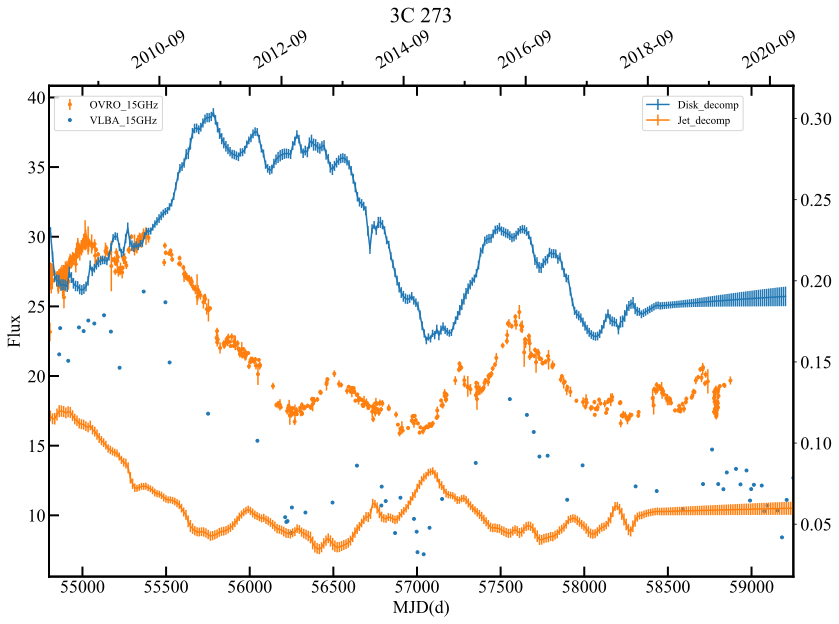

In [177]:
fig, ax = plt.subplots(1, 1,figsize=(8*1.5,6*1.5))

'''for i in range(len(table_ATCA_3C273_5GHz)):
    flux_and_err=table_ATCA_3C273_5GHz.loc[i,'Flux Density (Jy)']
    flux=flux_and_err.split('±')[0]
    err_flux=flux_and_err.split('±')[1]   
    ax.errorbar(table_ATCA_3C273_5GHz.loc[i,'mjd'],float(flux),float(err_flux),
              ls=':',marker='.',markersize=10,color='r',label='VLA 5GHz')
'''

ax.errorbar(mojave_15GHz_3c273['mjd'],mojave_15GHz_3c273['flux'],#*1.2,
            fmt='.',label='VLBA_15GHz')

ax.errorbar(ovro_40m_3C273['mjd'],ovro_40m_3C273['flux'],ovro_40m_3C273['flux err'],
            fmt='.',label='OVRO_15GHz')
    

set_ax_tick(ax) 
ax.set_title('3C 273')
ax.set_xlabel(r'MJD(d)')
ax.set_ylabel(r'Flux')


ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)


ax2=ax.twinx()
#ax2.errorbar(data_3C273['JD1']-2400000.5,data_3C273['F5100'],label='5100')
#ax2.errorbar(data_3C273['JD1']-2400000.5,data_3C273['FHbeta'],label='Hbeta')
ax2.errorbar(Disk3C273_decomp['mjd'],
            Disk3C273_decomp['Diskflux_V'],
            yerr=Disk3C273_decomp['err_Diskflux_V'],
                            label='Disk_decomp')

ax2.errorbar(Jet3C273_decomp['mjd'],Jet3C273_decomp['Jetflux_V'],
            yerr=Jet3C273_decomp['err_Jetflux_V'],label='Jet_decomp')

'''ax2.errorbar(Jet3C273_decomp['mjd'],Jet3C273_decomp['Jetflux_V']#+Disk3C273_decomp['Diskflux_V'],
             #yerr=Jet3C273_decomp['err_Jetflux_V'],
             label='Jet+Disk')
'''



ax2.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax2.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax2.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.79, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    
fig.tight_layout()

range_l,range_r=(55000-200,59250)
ax.set_xlim(range_l,range_r)
plt.savefig('/Users/lyubing/IHEPBox/JetRM_plot/3C273_plot/3C273_decomp_lc_radio_optical_%d_%d.png'%(range_l,range_r),dpi=400)


In [174]:
time_l,time_r=(55000,58000)
mask_time_jet=np.logical_and(Jet3C273_decomp['mjd']>time_l,Jet3C273_decomp['mjd']<time_r)
Jet3C273_decomp_select=Jet3C273_decomp[mask_time_jet]

mask_time_disk=np.logical_and(Disk3C273_decomp['mjd']>time_l,Disk3C273_decomp['mjd']<time_r)
Disk3C273_decomp_select=Disk3C273_decomp[mask_time_disk]

In [175]:
np.mean(Jet3C273_decomp_select['Jetflux_V']),np.mean(Disk3C273_decomp_select['Diskflux_V'])

(0.05795143362831858, 0.23649457500000007)

In [176]:
0.058/(0.058+0.236)

0.19727891156462588

In [171]:
0.071/(0.071+0.224)

0.2406779661016949

In [ ]:
Disk3C273_decomp.columns

In [ ]:
Jet3C273_decomp.columns

## flux_scale_zhang3c273

In [ ]:
12- 16 F5.2   10-17W/m2/nm   F5100    [14/24.1]? Continuum flux at 5100{AA},
                                        in 10^-15^erg/s/cm^2^/{AA}
18- 21 F4.2   10-17W/m2/nm e_F5100    [0.2/0.3]? Uncertainty in F5100
23- 27 F5.2   10-16W/m2      FHbeta   [15.5/19.7]? H{beta} emission-line flux,
                                        in 10^-13^erg/s/cm^2^
29- 32 F4.2   10-16W/m2    e_FHbeta   [0.15/0.3]? Uncertainty in FHbeta

In [46]:
flux_scale_5100=4*np.pi*(D_cm_3C273.value)**2*1.0e-15 # erg s^-1 A^-1
flux_scale_Hbeta=4*np.pi*(D_cm_3C273.value)**2*1.0e-13 # erg s^-1

In [47]:
D_cm_3C273.value

2.3433282196438376e+27

## Wu2004load L5100_LHbeta

In [48]:
Wu2004_LHbeta_L5100=pd.read_csv('/Users/lyubing/IHEPBox/JetRM_plot/Wu2004_LHbeta_L5100.py',delimiter='&')

In [ ]:
Wu2004_LHbeta_L5100.columns#.iloc[0]#.columns

## Rakshit et al. (2020)

log Halpha= 1.126 \pm 0.004 * log 5100- 6.89\pm 0.20 
log Hb= 0.947  \pm 0.002 * log 5100- 0.45\pm 0.09 

log Hb= 1.057  \pm 0.002 * log 5100- 4.41\pm 0.1 #adopt
 


## plot LHbeta-L5100

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(6,6))

'''for i in range(len(Wu2004_LHbeta_L5100)):
    flux_and_err=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[4]]
    flux=flux_and_err.split('$\pm$')[0]
    err_flux=flux_and_err.split('$\pm$')[1]   
    
    flux_and_err_Hbeta=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[5]]
    flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[0]
    err_flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[1]   
    
    ax.errorbar(x=np.log10(float(flux))+42,
                #xerr=float(err_flux),
                y=np.log10(float(flux_Hbeta))+42,
                #yerr=float(err_flux_Hbeta),
              ls=':',marker='.',markersize=10,color='grey',label='Wu2004')
'''
flux_label=data_3C273.colnames[1]
e_flux_label=data_3C273.colnames[2]
flux_label_1=data_3C273.colnames[3]
e_flux_label_1=data_3C273.colnames[4]
print(flux_label,e_flux_label)
print(flux_label_1,e_flux_label_1)



ax.errorbar(x=np.log10(data_3C273[flux_label]*flux_scale_5100*5100),
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
            y=np.log10(data_3C273[flux_label_1]*flux_scale_Hbeta),
            #yerr=np.log10(data_3C273[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='3C 273')



slope=1.02747111
offset=3.04154998

L5100_linspace=np.linspace(45.6,46)    
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Wu2004 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))


slope=0.947
offset=0.45
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Rakshit2020 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))


slope=1.057
offset=4.41
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Rakshit2020 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))


    
ax.set_xlabel(r'log$L_{5100\AA} (\mathrm{erg\, s^{-1}})$')
ax.set_ylabel(r'log$L_{H\beta} (\mathrm{erg\, s^{-1}})$')


#ax.semilogx()
#ax.semilogy()
ax.set_title('3C 273')
ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

ax.set_xlim(45.5,46)
ax.set_ylim(44.0-0.2,44.5-0.2)

#plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    
set_ax_tick(ax)
fig.tight_layout()
plt.savefig('/Users/lyubing/IHEPBox/JetRM_plot/3C273_plot/3C273_Hbeta_L5100.png',dpi=400)


In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(8,8))

for i in range(len(Wu2004_LHbeta_L5100)):
    flux_and_err=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[4]]
    flux=flux_and_err.split('$\pm$')[0]
    err_flux=flux_and_err.split('$\pm$')[1]   
    
    flux_and_err_Hbeta=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[5]]
    flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[0]
    err_flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[1]   
    
    ax.errorbar(x=np.log10(float(flux))+42,
                #xerr=float(err_flux),
                y=np.log10(float(flux_Hbeta))+42,
                #yerr=float(err_flux_Hbeta),
              ls=':',marker='.',markersize=10,color='grey',label='Wu2004')

flux_label=data_3C273.colnames[1]
e_flux_label=data_3C273.colnames[2]
flux_label_1=data_3C273.colnames[3]
e_flux_label_1=data_3C273.colnames[4]
print(flux_label,e_flux_label)
print(flux_label_1,e_flux_label_1)




ax.errorbar(x=np.log10(data_3C273[flux_label]*flux_scale_5100*5100),
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
            y=np.log10(data_3C273[flux_label_1]*flux_scale_Hbeta),
            #yerr=np.log10(data_3C273[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='3C 273')

slope=1.02747111
offset=3.04154998

L5100_linspace=np.linspace(41,46)    
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))

'''slope=0.947
offset=0.45
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Rakshit2020 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))
''' 
slope=1.057
offset=4.41
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Rakshit2020 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))


ax.set_xlabel(r'log$L_{5100\AA} (\mathrm{erg\, s^{-1}})$')
ax.set_ylabel(r'log$L_{H\beta} (\mathrm{erg\, s^{-1}})$')


#ax.semilogx()
#ax.semilogy()
#ax.set_title('3C 273')
ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
#by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.35, 0.19),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

#ax.set_xlim(40,47)
#ax.set_ylim(39,46)

#plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    
set_ax_tick(ax)
fig.tight_layout()
plt.savefig('/Users/lyubing/IHEPBox/JetRM_plot/AGN_Hbeta_L5100.png',dpi=400)


In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(8,6))

for i in range(4):
    flux_label=data_3C273.colnames[i*2+1]
    e_flux_label=data_3C273.colnames[i*2+2]
    
    ax.errorbar(data_3C273['mjd'],data_3C273[flux_label],data_3C273[e_flux_label],
                 fmt='.',label=flux_label)

ax.errorbar(mojave_15GHz_3c273['mjd'],mojave_15GHz_3c273['flux'],
            fmt='.',label='VLBA_15GHz')

ax.errorbar(ovro_40m_3C273['mjd'],ovro_40m_3C273['flux'],ovro_40m_3C273['flux err'],
            fmt='.',label='OVRO_15GHz')
    
    
ax.set_xlim(54000,58500)

    
ax.set_xlabel(r'MJD(d)')
ax.set_ylabel(r'Flux')

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.99, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    
set_ax_tick(ax)
fig.tight_layout()
plt.savefig('/Users/lyubing/IHEPBox/JetRM_plot/zhang_line_lc_origin.png',dpi=400)


In [ ]:
x=data_3C273['mjd']
y=data_3C273['F5100']
yunc=np.ones(len(x))

fit = fitting.LinearLSQFitter()

# initialize the outlier removal fitter
or_fit = fitting.FittingWithOutlierRemoval(fit, sigma_clip, niter=3, sigma=3.0)

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line, mask = or_fit(line_init, x, y, weights=1.0/yunc)
filtered_data = np.ma.masked_array(y, mask=mask)

# plot
fig, ax = plt.subplots(1, 1,figsize=(8,6))
ax.errorbar(x, y, yerr=yunc, fmt="ko", fillstyle="none", label="Clipped Data")
ax.errorbar(x, filtered_data, fmt="ko", label="Fitted Data")
#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
ax.plot(x, fitted_line(x), 'k-', label='Fitted Model')
#plt.xlim(-2,12)
#plt.ylim(-5,25)

plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    
set_ax_tick(ax)

plt.xlabel('MJD')
plt.ylabel('F5100')
plt.legend()
plt.show()

## OVRO

In [167]:
ovro_40m_3C273=pd.read_csv('%s/J1229+0203_OVRO_40m.csv'%data_3C273_dir_mojave)

In [ ]:
min(ovro_40m_3C273['flux']),max(ovro_40m_3C273['flux'])

## mojave_15GHz

In [166]:
mojave_15GHz_3c273=pd.read_excel('%s/VLBA_3c273.xlsx'%data_3C273_dir_mojave,sheet_name='Sheet2')
mojave_15GHz_3c273=mojave_15GHz_3c273[mojave_15GHz_3c273['VLBA I'].notnull()]
mojave_15GHz_3c273=mojave_15GHz_3c273[mojave_15GHz_3c273['VLBA Code'].notnull()]

mojave_15GHz_3c273.columns=['Epoch', 'VLBA Code', 'VLBA I', 'VLBA P', 'VLBA percentage', 'VLBA degree',
                           'I Image (Nat. Weight)', 'Tapered I Image',
                           'Tapered I Image (Widefield)', 'Visibility', 
                            'Stokes I Radplot', 'Pol.','note']


mojave_15GHz_3c273['mjd']=convert_mjd(mojave_15GHz_3c273['Epoch'])
mojave_15GHz_3c273['flux']=mojave_15GHz_3c273['VLBA I']/1000
mojave_15GHz_3c273['err']=0


In [ ]:
mojave_15GHz_3c273

In [ ]:
mojave_15GHz_3c273[['mjd','flux','err']]

## Liyanrong 2020 UVOT

In [ ]:
data_3C273_UVOT=pd.read_excel(os.path.join(data_dir_3C273,'..','UVOT_3C273.xlsx'))

In [ ]:
data_3C273_UVOT['mjd']=data_3C273_UVOT['JD-2,450,000']+50000-0.5

In [ ]:
data_3C273_UVOT

In [ ]:
root_dir.replace(' ','_')

## SMA_3C273

In [ ]:
SMA_3c273=pd.read_csv(os.path.join(lag_data_dir,'SMA_3C273.py'),delimiter='\s+')#SMA

In [ ]:
SMA_3c273.columns

In [ ]:
day=SMA_3c273['day']
month=SMA_3c273['month']
year=SMA_3c273['year']
time=SMA_3c273['time']

month_number=[]
for i in month.values:
    month_number.append(strptime(i,'%b').tm_mon)
    
h=[]
m=[]
for i in time.values:
    h.append(i.split(":")[0])
    m.append(i.split(":")[1])

SMA_3c273['mon_num']=month_number
SMA_3c273['hour']=h
SMA_3c273['minute']=m

##############################
#day=SMA_3c273['day']
month_num=SMA_3c273['mon_num']
#year=SMA_3c273['year']
hour=SMA_3c273['hour']
minute=SMA_3c273['minute']


In [ ]:
times=[]
for i,(d_,m_,y_,h_,mi_) in enumerate(zip(day,month_num,year,hour,minute)):                 
    times.append(Time(datetime(y_,m_,d_,int(h_),int(mi_),0),scale='ut1').mjd)
    
'''
timesut=[]
for i,(d_,m_,y_,h_,mi_) in enumerate(zip(day,month_num,year,hour,minute)):                 
    timesut.append(Time(datetime(y_,m_,d_,h_,mi_,0),scale='ut1'))  
'''    
SMA_3c273['mjd']=times

convert_date_single(52657.272917)

In [ ]:
SMA_3c273

In [ ]:
SMA_3c273_1mm=SMA_3c273[SMA_3c273['BAND']=='1mm']
SMA_3c273_850=SMA_3c273[SMA_3c273['BAND']=='850']

In [ ]:
len(SMA_3c273),len(SMA_3c273_1mm),len(SMA_3c273_850)

In [ ]:
SMA_3c273_850

## ATCA_calibrator

In [ ]:
ATCA_3C273_url='https://www.narrabri.atnf.csiro.au/calibrators/calibrator_database_viewcal?source=1226+023&detailed=true'

In [ ]:
table_ATCA_3C273=pd.read_html(ATCA_3C273_url)

In [ ]:
len(table_ATCA_3C273),table_ATCA_3C273,table_ATCA_3C273[18]

In [ ]:
os.listdir(lag_data_dir)

In [ ]:
table_ATCA_3C273_origin=pd.read_excel(os.path.join(lag_data_dir,'3C273_ATCA_calitrator_origin.xlsx'))

In [ ]:
table_ATCA_3C273_origin.columns

table_ATCA_3C273_origin[table_ATCA_3C273_origin['Epoch'].str.startswith('Band')]

In [ ]:
table_ATCA_3C273_origin.columns

table_ATCA_3C273_origin.iloc[0]

In [ ]:
if isinstance(table_ATCA_3C273_origin.loc[2,'Closure Phase'],str):
    print(table_ATCA_3C273_origin.loc[2,'Closure Phase'])

table_ATCA_3C273=pd.DataFrame([])

for i in range(len(table_ATCA_3C273_origin)):
    if isinstance(table_ATCA_3C273_origin.loc[i,'Closure Phase'],str):
        row_table=table_ATCA_3C273_origin.iloc[i]
        print(i)
    else:
        print(table_ATCA_3C273_origin.loc[i,'Closure Phase'])

i=3
row_table = pd.DataFrame(
           [
            table_ATCA_3C273_origin.loc[i-1,table_ATCA_3C273_origin.columns[0]],
            table_ATCA_3C273_origin.loc[i-1,table_ATCA_3C273_origin.columns[1]],
            table_ATCA_3C273_origin.loc[i-1,table_ATCA_3C273_origin.columns[2]],
            table_ATCA_3C273_origin.loc[i-1,table_ATCA_3C273_origin.columns[3]],       
            table_ATCA_3C273_origin.loc[i,table_ATCA_3C273_origin.columns[0]],
            table_ATCA_3C273_origin.loc[i,table_ATCA_3C273_origin.columns[1]],
            table_ATCA_3C273_origin.loc[i,table_ATCA_3C273_origin.columns[2]],
            table_ATCA_3C273_origin.loc[i,table_ATCA_3C273_origin.columns[3]],
            table_ATCA_3C273_origin.loc[i,table_ATCA_3C273_origin.columns[8]]
           ],            
            )#columns=table_ATCA_3C273_origin.columns

In [ ]:
row_table.T

In [ ]:
table_ATCA_3C273=pd.DataFrame([])

for i in range(len(table_ATCA_3C273_origin)):
    if isinstance(table_ATCA_3C273_origin.loc[i,'Closure Phase'],str):
        row_table=table_ATCA_3C273_origin.iloc[i]
        #print(i)
    
    else:
        print(i)
        
        row_table = pd.DataFrame(
           [
            table_ATCA_3C273_origin.loc[i-1,table_ATCA_3C273_origin.columns[0]],
            table_ATCA_3C273_origin.loc[i-1,table_ATCA_3C273_origin.columns[1]],
            table_ATCA_3C273_origin.loc[i-1,table_ATCA_3C273_origin.columns[2]],
            table_ATCA_3C273_origin.loc[i-1,table_ATCA_3C273_origin.columns[3]],       
            table_ATCA_3C273_origin.loc[i,table_ATCA_3C273_origin.columns[0]],
            table_ATCA_3C273_origin.loc[i,table_ATCA_3C273_origin.columns[1]],
            table_ATCA_3C273_origin.loc[i,table_ATCA_3C273_origin.columns[2]],
            table_ATCA_3C273_origin.loc[i,table_ATCA_3C273_origin.columns[3]],
            table_ATCA_3C273_origin.loc[i,table_ATCA_3C273_origin.columns[8]],
           ])
            
        row_table=row_table.T
        row_table.columns= table_ATCA_3C273_origin.columns   
            
        
    table_ATCA_3C273=table_ATCA_3C273.append(row_table,ignore_index=True)        
          
        
    
    

In [ ]:
year=[]
month=[]
day=[]

for i in table_ATCA_3C273['Epoch'].values:
    year.append(i.split("-")[0])
    month.append(strptime(i.split("-")[1],'%b').tm_mon)
    day.append(i.split("-")[2])
    
    
times=[]
for i,(d_,m_,y_,) in enumerate(zip(day,month,year)):                 
    times.append(Time(datetime(int(y_),m_,int(d_),0,0,0),scale='ut1').mjd)
    
'''
timesut=[]
for i,(d_,m_,y_,h_,mi_) in enumerate(zip(day,month_num,year,hour,minute)):                 
    timesut.append(Time(datetime(y_,m_,d_,h_,mi_,0),scale='ut1'))  
'''    
table_ATCA_3C273['mjd']=times  m  

table_ATCA_3C273.to_excel(os.path.join(lag_data_dir,'3C273_ATCA_calitrator_modified.xlsx'),index=False)

In [ ]:
table_ATCA_3C273=pd.read_excel(os.path.join(lag_data_dir,'3C273_ATCA_calitrator_modified.xlsx'))

In [ ]:
table_ATCA_3C273.columns

In [ ]:
table_ATCA_3C273_5GHz=table_ATCA_3C273[abs(table_ATCA_3C273['Frequency']-5000)<1000]
table_ATCA_3C273_5GHz=drop_index(table_ATCA_3C273_5GHz)

In [ ]:
for i in range(len(table_ATCA_3C273_5GHz)):
    flux_density_err=table_ATCA_3C273_5GHz.loc[i,'Flux Density (Jy)']
    table_ATCA_3C273_5GHz.loc[i,'flux']= float(flux_density_err.split('± ')[0])
    table_ATCA_3C273_5GHz.loc[i,'e_flux']= float(flux_density_err.split('± ')[1])

In [ ]:
table_ATCA_3C273_5GHz

## plot 3C 273

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(8,6))

'''for i in range(len(table_ATCA_3C273_5GHz)):
    flux_and_err=table_ATCA_3C273_5GHz.loc[i,'Flux Density (Jy)']
    flux=flux_and_err.split('±')[0]
    err_flux=flux_and_err.split('±')[1]   
    ax.errorbar(table_ATCA_3C273_5GHz.loc[i,'mjd'],float(flux),float(err_flux),
              ls=':',marker='.',markersize=10,color='r',label='VLA 5GHz')
'''

ax.errorbar(mojave_15GHz_3c273['mjd'],mojave_15GHz_3c273['flux']*1.2,
            fmt='.',label='VLBA_15GHz')

ax.errorbar(ovro_40m_3C273['mjd'],ovro_40m_3C273['flux'],ovro_40m_3C273['flux err'],
            fmt='.',label='OVRO_15GHz')
    

set_ax_tick(ax) 
ax.set_title('3C 273')
ax.set_xlabel(r'MJD(d)')
ax.set_ylabel(r'Flux')


ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)


ax2=ax.twinx()
ax2.errorbar(data_3C273['JD1']-2400000.5,data_3C273['F5100'],label='5100')
ax2.errorbar(data_3C273['JD1']-2400000.5,data_3C273['FHbeta'],label='Hbeta')

ax2.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax2.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax2.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.79, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    
fig.tight_layout()

range_l,range_r=(57000-200,58250)
ax.set_xlim(range_l,range_r)
plt.savefig('/Users/lyubing/IHEPBox/JetRM_plot/3C273_plot/3C273_lc_radio_optical_%d_%d.png'%(range_l,range_r),dpi=400)


In [ ]:
data_3C273.colnames

# PKS1510-089

## flux_scale_PKS1510

In [179]:
D_cm_PKS1510=cosmo.luminosity_distance(0.361).to(u.cm)
flux_scale_5100_PKS1510=4*np.pi*(D_cm_PKS1510.value)**2*1.0e-15 # erg s−1 cm−2 Å−1
flux_scale_Hbeta_PKS1510=4*np.pi*(D_cm_PKS1510.value)**2*1.0e-15 #erg s−1 cm−2

In [325]:
from astropy import constants as const
lightday=const.c.value*24*60*60 #m

const.c.value

In [345]:
print('r_blr in unit  lightday:', r_blr_unit_m.value/lightday)

r_blr in unit  lightday: 93.77596898782694


In [346]:
(1+0.361)*93.77

127.62097

In [350]:
61/(1+0.361)

44.81998530492285

In [355]:
'%.2e'%(127.62097/44.8*5.71e7)

'1.63e+08'

In [357]:
'%.2e'%10**8.5

'3.16e+08'

In [359]:
2.2e15/r_blr_unit_m.value

0.9057256665518798

In [366]:
'%.2e'%(lightday*10) #m

'2.59e+14'

In [368]:
#Mass_BH_PKS1510=10**8.5*u.solMass #sol_mass
Mass_BH_PKS1510s=[10**8.5,7.32e7]*u.solMass #sol_mass

for Mass_BH_PKS1510 in Mass_BH_PKS1510s:
    Rg=  (const.G*Mass_BH_PKS1510)/(const.c)**2
    Rg_unit_m=Rg.to(u.m)

    print('10lightday in unit Rg for BH of %.2e solor mass :'%Mass_BH_PKS1510.value,10*lightday/Rg_unit_m.value)

    
    Ldisk=5.9e45
    r_blr=10**17*(Ldisk/1e45)**(0.5)*u.cm
    r_blr_unit_m=r_blr.to(u.m)

    r_TD=10**18*(Ldisk/1e45)**(0.5)*u.cm
    r_TD_unit_m =r_TD.to(u.m)


    print('r_blr in unit Rg for BH of %.2e solor mass :'%Mass_BH_PKS1510.value,r_blr_unit_m/Rg_unit_m)
    print('r_TD in unit Rg for BH of %.2e solor mass :'%Mass_BH_PKS1510.value,r_TD_unit_m/Rg_unit_m)
    
    print('r_blr 44lightday in unit Rg for BH of %.2e solor mass :'%Mass_BH_PKS1510.value ,44.81*lightday/Rg_unit_m.value)
    print()


10lightday in unit Rg for BH of 3.16e+08 solor mass : 554.7077291237104
r_blr in unit Rg for BH of 3.16e+08 solor mass : 5201.825480361297
r_TD in unit Rg for BH of 3.16e+08 solor mass : 52018.25480361297
r_blr 44lightday in unit Rg for BH of 3.16e+08 solor mass : 2485.645334203346

10lightday in unit Rg for BH of 7.32e+07 solor mass : 2396.3659285937733
r_blr in unit Rg for BH of 7.32e+07 solor mass : 22472.153700329483
r_TD in unit Rg for BH of 7.32e+07 solor mass : 224721.53700329477
r_blr 44lightday in unit Rg for BH of 7.32e+07 solor mass : 10738.115726028698



In [348]:
6.82e13/lightday

2.6329943625594874

In [294]:
'%.3e'%(1*u.lightyear.to(u.m)/365.0)

'2.592e+13'

In [314]:
lightday

25902068371200.0

In [315]:
'%.3e'%lightday

'2.590e+13'

554.7077291237104

<Quantity 2.42899156e+15 m>

In [318]:
r_blr.to(u.m).value/Rg_unit_m.value

5201.825480361295

In [320]:
1*u.pc.to(u.m)

3.085677581491367e+16

In [321]:
r_blr.to(u.pc)

<Quantity 0.07871826 pc>

In [322]:
r_TD=10**18*5.9**(0.5)*u.cm
r_TD.to(u.m)

<Quantity 2.42899156e+16 m>

In [323]:
r_TD.to(u.pc)

<Quantity 0.78718255 pc>

## SMA_1510

In [50]:
SMA_PKS1510=pd.read_csv(os.path.join(lag_data_dir,'SMA_PKS1510.py'),skiprows=1,delimiter='\s+')#SMA

In [51]:
SMA_PKS1510

BAND  day month  year   time OBSERV.  F(GHz)  FLUX(JY)   or  ERROR  \
0    1mm    3   Jun  2003  05:23     SMA  229.00     0.920  +/-  0.190   
1    1mm   12   Aug  2003  05:53     SMA  236.00     0.879  +/-  0.133   
2    1mm    1   Apr  2005  02:56     SMA  221.56     0.659  +/-  0.086   
3    1mm   19   Dec  2005  17:07     SMA  218.10     0.576  +/-  0.047   
4    1mm   20   Dec  2005  17:41     SMA  225.57     0.640  +/-  0.043   
..   ...  ...   ...   ...    ...     ...     ...       ...  ...    ...   
217  850    3   Sep  2009  05:02     SMA  340.77     0.624  +/-  0.129   
218  850    7   Oct  2010  04:24     SMA  336.17     1.511  +/-  0.119   
219  850    3   Aug  2011  06:08     SMA  339.81     1.747  +/-  0.095   
220  850    4   Aug  2013  07:33     SMA  334.73     0.820  +/-  0.130   
221  850   27   Mar  2021  15:18     SMA  346.97     1.354  +/-  0.072   

    FLUX_P.I.  
0    mgurwell  
1    mgurwell  
2    mgurwell  
3    mgurwell  
4    mgurwell  
..        ...  
217  mgurwell  
218  mgurwell  
219  mgurwell  
220  mgurwell  
221  mgurwell  

[222 rows x 11 columns]

In [ ]:
day=SMA_PKS1510['day']
month=SMA_PKS1510['month']
year=SMA_PKS1510['year']
time=SMA_PKS1510['time']

month_number=[]
for i in month.values:
    month_number.append(strptime(i,'%b').tm_mon)

h=[]
m=[]
for i in time.values:
    h.append(i.split(":")[0])
    m.append(i.split(":")[1])

SMA_PKS1510['mon_num']=month_number
SMA_PKS1510['hour']=h
SMA_PKS1510['minute']=m

##############################
#day=SMA_PKS1510['day']
month_num=SMA_PKS1510['mon_num']
#year=SMA_PKS1510['year']
hour=SMA_PKS1510['hour']
minute=SMA_PKS1510['minute']

In [ ]:
times=[]
for i,(d_,m_,y_,h_,mi_) in enumerate(zip(day,month_num,year,hour,minute)):
    times.append(Time(datetime(y_,m_,d_,int(h_),int(mi_),0),scale='ut1').mjd)

'''
    timesut=[]
    for i,(d_,m_,y_,h_,mi_) in enumerate(zip(day,month_num,year,hour,minute)):
    timesut.append(Time(datetime(y_,m_,d_,h_,mi_,0),scale='ut1'))
    '''
SMA_PKS1510['mjd']=times

SMA_PKS1510.to_csv(os.path.join(lag_data_dir,'SMA_PKS1510_modified.csv'),index=False)

###  SMA_PKS1510_load

In [52]:
SMA_PKS1510_load=pd.read_csv(os.path.join(lag_data_dir,'SMA_PKS1510_modified.csv'))

In [53]:
SMA_PKS1510_1mm=SMA_PKS1510_load[SMA_PKS1510_load['BAND']=='1mm'] #1mm 300GHz
SMA_PKS1510_850=SMA_PKS1510_load[SMA_PKS1510_load['BAND']=='850'] #850mum 350GHz

In [ ]:
len(SMA_PKS1510),len(SMA_PKS1510_1mm),len(SMA_PKS1510_850)

In [ ]:
SMA_PKS1510_1mm.columns

In [ ]:
'%.1e GHz'%(3e8/1e-3/1e9),'%.1e GHz'%(3e8/850e-6/1e9)

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(8,6))

ax.errorbar(SMA_PKS1510_1mm['mjd'],SMA_PKS1510_1mm['FLUX(JY)'],SMA_PKS1510_1mm['ERROR'],
              ls=':',marker='.',markersize=10,color='r',label='SMA 300GHz')

ax.errorbar(SMA_PKS1510_850['mjd'],SMA_PKS1510_850['FLUX(JY)'],SMA_PKS1510_850['ERROR'],
              ls=':',marker='.',markersize=10,color='b',label='SMA 350GHz')

    
set_ax_tick(ax)  
ax.set_title('PKS1510-089')
ax.set_xlabel(r'MJD(d)')
ax.set_ylabel(r'Flux')



ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.99, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    


rangemin,rangemax=(54800,57200)
ax.set_xlim(rangemin,rangemax)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/SMA_calibrator_300GHz.png'
save_lc_img_path='/Users/lyubing/IHEPBox/JetRM_plot/PKS1510_plot/SMA_calibrator_300GHz_%d_%d.png'%(rangemin,rangemax)
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
#plt.close()

## [SMARTS optical](http://www.astro.yale.edu/smarts/glast/home.php)

In [54]:
SMARTS_PKS1510=Table.read('%s/1510-089.tab'%lagdata_dir_PKS1510,format='ascii')

In [ ]:
#B	    B        B          V  	    V        V          R  	    R        R          J  	    J        J          K  	    K        K            
#    JD start        JD start      mag      err      JD start      mag      err      JD start      mag      err      JD start      mag      err      JD start      mag      err

In [210]:
SMARTS_PKS1510


<Table length=711>
     col1          col2       col3    col4       col5       col6  ...  col12   col13   col14   col15   col16 
   float64       float64    float64 float64    float64    float64 ... float64 float64 float64 float64 float64
------------- ------------- ------- ------- ------------- ------- ... ------- ------- ------- ------- -------
2454501.81755         999.0   999.0   999.0         999.0   999.0 ...  14.883   0.021   999.0   999.0   999.0
2454537.77108         999.0   999.0   999.0         999.0   999.0 ...  14.302   0.016   999.0   999.0   999.0
2454603.70459 2454603.70459   17.24   0.011         999.0   999.0 ...  14.646   0.024   999.0   999.0   999.0
2454640.56042 2454640.56042  17.262   0.006         999.0   999.0 ...   15.22    0.03   999.0   999.0   999.0
2454662.63167 2454662.63167   17.09   0.011 2454662.63836  16.806 ...  14.895   0.026   999.0   999.0   999.0
2454677.63073 2454677.63073  17.223   0.021 2454677.63191  17.059 ...   999.0   999.0   999.0   999.0   999.0
          ...           ...     ...     ...           ...     ... ...     ...     ...     ...     ...     ...
2457902.69941 2457902.69941   17.49   0.024 2457902.70196  16.579 ...   999.0   999.0   999.0   999.0   999.0
2457913.57597         999.0   999.0   999.0 2457913.57767  16.394 ...   14.28    0.05   999.0   999.0   999.0
2457914.57443 2457914.57443  18.312   0.034 2457914.57704  16.548 ...  14.184   0.041   999.0   999.0   999.0
2457915.58765 2457915.58765  17.546   0.031 2457915.59025   16.48 ...  14.585   0.043   999.0   999.0   999.0
 2457916.5694  2457916.5694  17.551   0.028 2457916.57201  16.418 ...  14.416   0.048   999.0   999.0   999.0
2457918.58251 2457918.58251  17.205   0.027 2457918.58511  16.516 ...   999.0   999.0   999.0   999.0   999.0
2457919.56711 2457919.56711  17.644   0.076 2457919.56972  16.488 ...   999.0   999.0   999.0   999.0   999.0

In [ ]:
SMARTS_PKS1510[['col5','col6','col7','col8','col9','col10']]#.colnames

In [ ]:
os.listdir(lagdata_dir_PKS1510)

In [240]:
SMARTS_PKS1510V=SMARTS_PKS1510[['col5','col6','col7']]
SMARTS_PKS1510V=SMARTS_PKS1510V[SMARTS_PKS1510V['col6']!=999.0]
SMARTS_PKS1510V['mjd']=SMARTS_PKS1510V['col5']-2400000.5
#SMARTS_PKS1510V=drop_index(SMARTS_PKS1510V)

In [ ]:
## lag

In [237]:
SMARTS_PKS1510V.colnames

['col5', 'col6', 'col7', 'mjd']

In [241]:
table_SMARTS_PKS1510V=SMARTS_PKS1510V.to_pandas()
table_SMARTS_PKS1510V=fermi_monitor_Vmag_to_flux(table_SMARTS_PKS1510V,table_SMARTS_PKS1510V.columns[1],table_SMARTS_PKS1510V.columns[2],D_cm_PKS1510)


In [244]:
table_SMARTS_PKS1510V

col5    col6   col7          mjd    logL_V  e_logL_V
0    2.454663e+06  16.806  0.011  54662.13836  30.49247    0.0044
1    2.454678e+06  17.059  0.027  54677.13191  30.39127    0.0108
2    2.454683e+06  17.021  0.023  54682.09971  30.40647    0.0092
3    2.454686e+06  17.117  0.028  54685.08986  30.36807    0.0112
4    2.454699e+06  17.096  0.033  54698.07659  30.37647    0.0132
..            ...     ...    ...          ...       ...       ...
666  2.457915e+06  16.548  0.034  57914.07704  30.59567    0.0136
667  2.457916e+06  16.480  0.030  57915.09025  30.62287    0.0120
668  2.457917e+06  16.418  0.025  57916.07201  30.64767    0.0100
669  2.457919e+06  16.516  0.023  57918.08511  30.60847    0.0092
670  2.457920e+06  16.488  0.081  57919.06972  30.61967    0.0324

[671 rows x 6 columns]

SMARTS_PKS1510V

In [109]:
SMARTS_PKS1510R=SMARTS_PKS1510[['col8','col9','col10']]
SMARTS_PKS1510R=SMARTS_PKS1510R[SMARTS_PKS1510R['col9']!=999.0]
SMARTS_PKS1510R['mjd']=SMARTS_PKS1510R['col8']-2400000.5

In [242]:
SMARTS_PKS1510R.colnames

['col8', 'col9', 'col10', 'mjd']

In [243]:
table_SMARTS_PKS1510R=SMARTS_PKS1510R.to_pandas()
table_SMARTS_PKS1510R=fermi_monitor_Rmag_to_flux(table_SMARTS_PKS1510R,table_SMARTS_PKS1510R.columns[1],table_SMARTS_PKS1510R.columns[2],D_cm_PKS1510)


In [245]:
table_SMARTS_PKS1510R

col8    col9  col10          mjd    logL_R  e_logL_R
0    2.454502e+06  16.350  0.006  54501.31755  30.60232    0.0024
1    2.454538e+06  15.975  0.004  54537.27108  30.75232    0.0016
2    2.454604e+06  16.422  0.018  54603.20875  30.57352    0.0072
3    2.454641e+06  16.569  0.008  54640.06458  30.51472    0.0032
4    2.454663e+06  16.345  0.012  54662.13584  30.60432    0.0048
..            ...     ...    ...          ...       ...       ...
671  2.457915e+06  16.074  0.028  57914.07912  30.71272    0.0112
672  2.457916e+06  15.987  0.024  57915.09234  30.74752    0.0096
673  2.457917e+06  15.979  0.023  57916.07409  30.75072    0.0092
674  2.457919e+06  16.042  0.024  57918.08720  30.72552    0.0096
675  2.457920e+06  16.124  0.082  57919.07180  30.69272    0.0328

[676 rows x 6 columns]

In [104]:
get_info(SMARTS_PKS1510V,'col6',label_err=None)

(13.535, 17.211, 16.347666169895678)

In [115]:
get_info(SMARTS_PKS1510V,'mjd',label_err=None)

(54662.138360000215, 57919.06972000003, 56143.641018047696)

In [107]:
get_info(SMARTS_PKS1510R,'col9',label_err=None)

(13.063, 16.686, 15.88808875739645)

In [113]:
!open /Users/lyubing/IHEPBox/JetRM_plot/PKS1510_plot

## Spectroscopic_PKS1510

In [59]:
table_PKS1510_path=os.path.join(data_dir_PKS1510,'table1.dat')
readme_PKS1510_path=os.path.join(data_dir_PKS1510,'ReadMe')
data_PKS1510=Table.read(table_PKS1510_path,
                      readme=readme_PKS1510_path,
                      format="ascii.cds",)


In [60]:
readme_PKS1510_path

'/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data/PKS 1510-089 spectroscopic light curvesJ_A+A_642_A59/ReadMe'

In [61]:
cat '/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data/PKS 1510-089 spectroscopic light curvesJ_A+A_642_A59/ReadMe'

J/A+A/642/A59       PKS 1510-089 spectroscopic light curves      (Rakshit, 2020)
Broad line region and black hole mass of PKS 1510-089 from spectroscopic
reverberation mapping.
    Rakshit S.
    <Astron. Astrophys. 642, A59 (2020)>
    =2020A&A...642A..59R        (SIMBAD/NED BibCode)
ADC_Keywords: Active gal. nuclei ; Spectroscopy ; Spectra, optical
Keywords: galaxies: active - galaxies: nuclei -
          galaxies: individual: PKS 1510-089 -
          quasar: supermassive black holes - techniques: spectroscopic

Abstract:
    Reverberation results of the flat spectrum radio quasar PKS 1510-089
    from 8.5 years of spectroscopic monitoring carried out at Steward
    Observatory over nine observing seasons between December 2008 and June
    2017 are presented. Optical spectra show strong H{beta}, H{gamma}, and
    FeII emission lines overlying on a blue continuum. All the continuum
    and emission line light curves show significant variability with
    fractional root-mean-square var

### plot LHbeta_L5100

In [181]:
data_PKS1510.colnames

['MJD',
 'F5100',
 'e_F5100',
 'FHb',
 'e_FHb',
 'FHg',
 'e_FHg',
 'F5100D',
 'e_F5100D',
 'FHbD',
 'e_FHbD',
 'FHgD',
 'e_FHgD']

In [ ]:
D_cm_PKS1510.value

In [208]:
range_l_mask_time_PKS1510,range_r_mask_time_PKS1510=(54928,55300)
mask_time_PKS1510=np.logical_and(data_PKS1510['MJD']>=range_l_mask_time_PKS1510,data_PKS1510['MJD']<range_r_mask_time_PKS1510)
data_PKS1510_select=data_PKS1510[mask_time_PKS1510]

F5100 e_F5100
FHb e_FHb


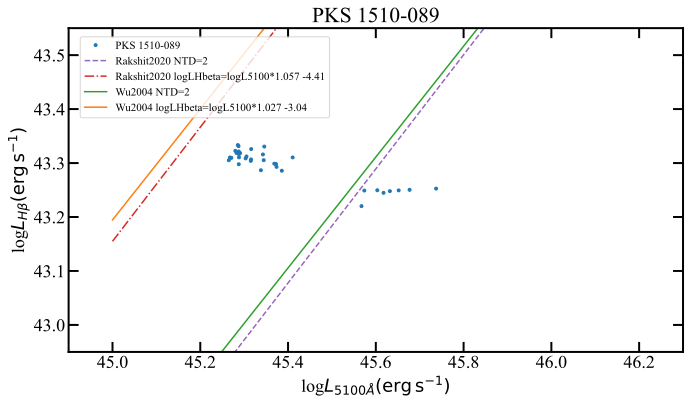

In [209]:
flux_label_PKS1510=data_PKS1510.colnames[1]
e_flux_label_PKS1510=data_PKS1510.colnames[2]
flux_label_1_PKS1510=data_PKS1510.colnames[3]
e_flux_label_1_PKS1510=data_PKS1510.colnames[4]
print(flux_label_PKS1510,e_flux_label_PKS1510)
print(flux_label_1_PKS1510,e_flux_label_1_PKS1510)


fig, ax = plt.subplots(1, 1,figsize=(10,6))

'''for i in range(len(Wu2004_LHbeta_L5100)):
    flux_and_err=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[4]]
    flux=flux_and_err.split('$\pm$')[0]
    err_flux=flux_and_err.split('$\pm$')[1]
    
    flux_and_err_Hbeta=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[5]]
    flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[0]
    err_flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[1]
    
    ax.errorbar(x=np.log10(float(flux))+42,
    #xerr=float(err_flux),
    y=np.log10(float(flux_Hbeta))+42,
    #yerr=float(err_flux_Hbeta),
    ls=':',marker='.',markersize=10,color='grey',label='Wu2004')
    '''

dataplot=data_PKS1510_select


ax.errorbar(x=np.log10(dataplot[flux_label_PKS1510]*flux_scale_5100_PKS1510*5100),
            #xerr=np.log10(data_PKS1510[e_flux_label]*flux_scale*5100),
            y=np.log10(dataplot[flux_label_1_PKS1510]*flux_scale_Hbeta_PKS1510),
            #yerr=np.log10(data_PKS1510[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='PKS 1510-089')




L5100_linspace=np.linspace(45.0,46)

slope=1.02747111
offset=3.04154998
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Wu2004 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))
Lhbeta= L5100_linspace*slope-offset-0.5
ax.plot(L5100_linspace,Lhbeta,label='Wu2004 NTD=2')



'''slope=0.947
offset=0.45
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,ls='-.',label='Rakshit2020 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))
Lhbeta= L5100_linspace*slope-offset-0.5
ax.plot(L5100_linspace,Lhbeta,ls='--',label='Rakshit2020 NTD=2 ')
'''



slope=1.057
offset=4.41
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,ls='-.',label='Rakshit2020 logLHbeta=logL5100*%.3f -%.2f'%(slope,offset))
Lhbeta= L5100_linspace*slope-offset-0.5
ax.plot(L5100_linspace,Lhbeta,ls='--',label='Rakshit2020 NTD=2 ')




ax.set_xlabel(r'log$L_{5100\AA} (\mathrm{erg\, s^{-1}})$')
ax.set_ylabel(r'log$L_{H\beta} (\mathrm{erg\, s^{-1}})$')


#ax.semilogx()
#ax.semilogy()

ax.set_title('PKS 1510-089')
ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

ax.set_xlim(45.0-0.1,46.3)
ax.set_ylim(42.95,43.55)

#plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)
set_ax_tick(ax)
fig.tight_layout()
plt.savefig('/Users/lyubing/IHEPBox/JetRM_plot/PKS1510_Hbeta_L5100_range_%d_%d.png'%(range_l_mask_time_PKS1510,range_r_mask_time_PKS1510),dpi=400)



In [ ]:
x=np.log10(data_PKS1510[flux_label_PKS1510]*flux_scale_5100_PKS1510*5100)
y=np.log10(data_PKS1510[flux_label_1_PKS1510]*flux_scale_Hbeta_PKS1510)
spearmanr(x,y),pearsonr(x,y)

data_PKS1510

### plot NTD

In [183]:
flux_label_PKS1510,flux_label_1_PKS1510

('F5100', 'FHb')

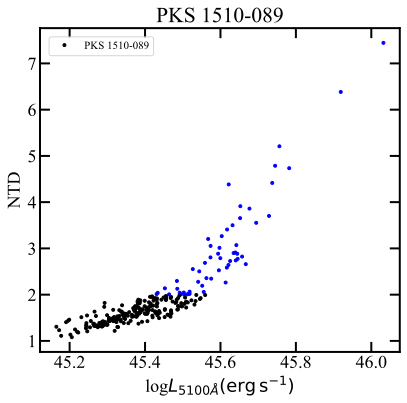

In [185]:
fig, ax = plt.subplots(1, 1,figsize=(6,6))

'''for i in range(len(Wu2004_LHbeta_L5100)):
    flux_and_err=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[4]]
    flux=flux_and_err.split('$\pm$')[0]
    err_flux=flux_and_err.split('$\pm$')[1]
    
    flux_and_err_Hbeta=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[5]]
    flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[0]
    err_flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[1]
    
    ax.errorbar(x=np.log10(float(flux))+42,
    #xerr=float(err_flux),
    y=np.log10(float(flux_Hbeta))+42,
    #yerr=float(err_flux_Hbeta),
    ls=':',marker='.',markersize=10,color='grey',label='Wu2004')
    '''


for i in range(len(data_PKS1510)):
    L5100=data_PKS1510[flux_label_PKS1510][i]*flux_scale_5100_PKS1510*5100
    logL5100= np.log10(L5100)
    
    LHb=data_PKS1510[flux_label_1_PKS1510][i]*flux_scale_Hbeta_PKS1510
    logLHb= np.log10(LHb)
    logL_p= (logLHb+4.41)/1.057 # log 𝐿H𝛽 = „1.057±0.002” log 𝐿5100‚„−4.41±0.10”.
    NTD= 10**(logL5100-logL_p)
    if NTD >2 :
        color='blue'
    else:
        color='black'
    ax.errorbar(
            x=logL5100,
            y=NTD,           
            #yerr=np.log10(data_PKS1510[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='PKS 1510-089',color=color)



'''slope=1.02747111
offset=3.04154998
L5100_linspace=np.linspace(45.0,46)
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Wu2004 logLHbeta=logL5100*%.2f -%.2f'%(slope,offset))


slope=0.947
offset=0.45
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,ls='-.',label='Rakshit2020 logLHbeta=logL5100*%.2f -%.2f'%(slope,offset))


slope=1.057
offset=4.41
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,ls='-.',label='Rakshit2020 logLHbeta=logL5100*%.2f -%.2f'%(slope,offset))


'''





ax.set_xlabel(r'log$L_{5100\AA} (\mathrm{erg\, s^{-1}})$')
ax.set_ylabel(r'NTD')
#ax.set_ylabel(r'log$L_{H\beta} (\mathrm{erg\, s^{-1}})$')


#ax.semilogx()
#ax.semilogy()

ax.set_title('PKS 1510-089')
ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

#ax.set_xlim(45.5,46)
#ax.set_ylim(44.0-0.2,44.5-0.2)

#plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)
set_ax_tick(ax)
fig.tight_layout()
plt.savefig('/Users/lyubing/IHEPBox/JetRM_plot/PKS1510_NTD_L5100.png',dpi=400)

In [ ]:
lag_data_dir

In [ ]:
!open '/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data/'

## UMRAO

In [149]:
table_UMRAO_PKS1510=pd.read_excel(os.path.join(lagdata_dir_PKS1510,'UMRAO.xlsx'))
table_UMRAO_PKS1510['mjd']=table_UMRAO_PKS1510['Julian_Day']-2400000.5

In [150]:
table_UMRAO_PKS1510

Julian_Day    YYYYMMDD  Freq.    U.T.     S  SigS     P  SigP      Xi  \
0     2455080.4  20090905.0    8.0  21.559  2.83  0.19  2.34  0.50  175.01   
1     2455082.4  20090907.0    8.0  20.984  3.09  0.05  2.79  0.48  179.02   
2     2455084.4  20090909.0    8.0  20.790  3.00  0.04  2.52  0.40  166.28   
3     2455085.4  20090910.0   14.5  22.081  2.45  0.05  3.06  0.63  168.08   
4     2455087.3  20090912.0   14.5  20.265  2.43  0.08   NaN   NaN     NaN   
..          ...         ...    ...     ...   ...   ...   ...   ...     ...   
248   2456064.7  20120517.0    8.0   3.939  5.94  0.09   NaN   NaN     NaN   
249   2456065.7  20120518.0    8.0   4.861  5.31  0.08  1.16  0.37   16.59   
250   2456066.7  20120519.0   14.5   5.653  5.56  0.05  0.75  0.25  132.07   
251   2456067.7  20120520.0   14.5   5.882  5.52  0.05   NaN   NaN     NaN   
252   2456068.7  20120521.0   14.5   5.624  5.57  0.05   NaN   NaN     NaN   

     SigXi  N      mjd  
0     8.79  1  55079.9  
1     8.90  1  55081.9  
2     4.65  1  55083.9  
3     5.64  1  55084.9  
4      NaN  1  55086.8  
..     ... ..      ...  
248    NaN  2  56064.2  
249   7.86  1  56065.2  
250  11.98  1  56066.2  
251    NaN  1  56067.2  
252    NaN  1  56068.2  

[253 rows x 12 columns]

In [151]:
table_UMRAO_PKS1510_14dot5GHz=table_UMRAO_PKS1510[table_UMRAO_PKS1510['Freq.']==14.5]

## OVRO_extractdata

In [62]:
data_dir_PKS1510

'/Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data/PKS 1510-089 spectroscopic light curvesJ_A+A_642_A59/'

In [63]:
table_OVRO_PKS1510_extract=pd.read_csv(os.path.join(lagdata_dir_PKS1510,'PKS1510_webdigit.csv'),header=None)
table_OVRO_PKS1510_extract.columns=['mjd','flux_15GHZ_ovro']
table_OVRO_PKS1510_extract['err']=table_OVRO_PKS1510_extract['flux_15GHZ_ovro']*0.05

In [ ]:
table_OVRO_PKS1510_extract

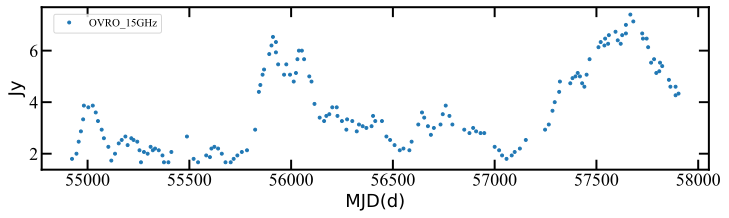

In [68]:
fig, ax = plt.subplots(1, 1,figsize=(12,3))
ax.errorbar(table_OVRO_PKS1510_extract[table_OVRO_PKS1510_extract.columns[0]],
           table_OVRO_PKS1510_extract[table_OVRO_PKS1510_extract.columns[1]],
           #table_OVRO_PKS1510_extract[table_OVRO_PKS1510_extract.columns[0]],
            ls='',marker='.',label='OVRO_15GHz'
            )

set_ax_tick(ax)
set_ax_legend(ax)
ax.set_xlabel(r'$\mathrm{MJD(d)}$')
ax.set_ylabel(r'$\mathrm{Jy}$')
plt.show()

## ATCA

In [ ]:
table_ATCA_PKS1510_origin=pd.read_excel(os.path.join(lag_data_dir,'PKS1510_ATCA_origin.xlsx'))

In [ ]:
table_ATCA_PKS1510_origin.columns

In [ ]:
table_ATCA_PKS1510=pd.DataFrame([])

for i in range(len(table_ATCA_PKS1510_origin)):
    if isinstance(table_ATCA_PKS1510_origin.loc[i,'Closure Phase'],str):
        row_table=table_ATCA_PKS1510_origin.iloc[i]
    #print(i)

    else:
        print(i)
        
        row_table = pd.DataFrame(
                                 [
                                  table_ATCA_PKS1510_origin.loc[i-1,table_ATCA_PKS1510_origin.columns[0]],
                                  table_ATCA_PKS1510_origin.loc[i-1,table_ATCA_PKS1510_origin.columns[1]],
                                  table_ATCA_PKS1510_origin.loc[i-1,table_ATCA_PKS1510_origin.columns[2]],
                                  table_ATCA_PKS1510_origin.loc[i-1,table_ATCA_PKS1510_origin.columns[3]],
                                  table_ATCA_PKS1510_origin.loc[i,table_ATCA_PKS1510_origin.columns[0]],
                                  table_ATCA_PKS1510_origin.loc[i,table_ATCA_PKS1510_origin.columns[1]],
                                  table_ATCA_PKS1510_origin.loc[i,table_ATCA_PKS1510_origin.columns[2]],
                                  table_ATCA_PKS1510_origin.loc[i,table_ATCA_PKS1510_origin.columns[3]],
                                  table_ATCA_PKS1510_origin.loc[i,table_ATCA_PKS1510_origin.columns[8]],
                                  ])
                                  
        row_table=row_table.T
        row_table.columns= table_ATCA_PKS1510_origin.columns

    table_ATCA_PKS1510=table_ATCA_PKS1510.append(row_table,ignore_index=True)

In [ ]:
table_ATCA_PKS1510['Epoch'][0].split('-')

In [ ]:
strptime('Nov','%b').tm_mon

In [ ]:
year=[]
month=[]
day=[]

for i in table_ATCA_PKS1510['Epoch'].values:
    year.append(i.split("-")[0])
    month.append(strptime(i.split("-")[1],'%b').tm_mon)
    day.append(i.split("-")[2])

In [ ]:
times=[]
for i,(d_,m_,y_,) in enumerate(zip(day,month,year)):                 
    times.append(Time(datetime(int(y_),m_,int(d_),0,0,0),scale='ut1').mjd)
    
'''
timesut=[]
for i,(d_,m_,y_,h_,mi_) in enumerate(zip(day,month_num,year,hour,minute)):                 
    timesut.append(Time(datetime(y_,m_,d_,h_,mi_,0),scale='ut1'))  
'''    
table_ATCA_PKS1510['mjd']=times

In [ ]:
table_ATCA_PKS1510.columns

table_ATCA_PKS1510.to_excel(os.path.join(lag_data_dir,'PKS1510_ATCA_calitrator_modified.xlsx'),index=False)

### table_ATCA_PKS1510_load

In [69]:
table_ATCA_PKS1510=pd.read_excel(os.path.join(lag_data_dir,'PKS1510_ATCA_calitrator_modified.xlsx'))

In [70]:
table_ATCA_PKS1510_5GHz=table_ATCA_PKS1510[abs(table_ATCA_PKS1510['Frequency']-5000)<1000]

table_ATCA_PKS1510_5GHz=drop_index(table_ATCA_PKS1510_5GHz)

In [ ]:
table_ATCA_PKS1510_5GHz.columns

In [71]:
for i in range(len(table_ATCA_PKS1510_5GHz)):
    flux_density_err=table_ATCA_PKS1510_5GHz.loc[i,'Flux Density (Jy)']
    table_ATCA_PKS1510_5GHz.loc[i,'flux']= float(flux_density_err.split('± ')[0])
    table_ATCA_PKS1510_5GHz.loc[i,'e_flux']= float(flux_density_err.split('± ')[1])

In [72]:
lagtable_ATCA_PKS1510_5GHz=table_ATCA_PKS1510_5GHz[['mjd','flux','e_flux']]
lagtable_ATCA_PKS1510_5GHz.columns=['t','flux','e_flux']
lagtable_ATCA_PKS1510_5GHz=lagtable_ATCA_PKS1510_5GHz.sort_values('t')

lagtable_ATCA_PKS1510_5GHz

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(8,6))

for i in range(len(table_ATCA_PKS1510_5GHz)):
    flux_and_err=table_ATCA_PKS1510_5GHz.loc[i,'Flux Density (Jy)']
    flux=flux_and_err.split('±')[0]
    err_flux=flux_and_err.split('±')[1]
    #print(flux,err_flux)
    ax.errorbar(table_ATCA_PKS1510_5GHz.loc[i,'mjd'],float(flux),float(err_flux),
              ls=':',marker='.',markersize=10,color='r',label='VLA 5GHz')
    
set_ax_tick(ax)  
ax.set_title('PKS1510-089')
ax.set_xlabel(r'MJD(d)')
ax.set_ylabel(r'Flux')

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.99, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    

ax.set_xlim(54800,57200)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/ATCA_calibrator_VLA_lc_5GHz.png'
save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/ATCA_calibrator_VLA_lc_5GHz_54800_57200.png'

plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
plt.close()

## mojave_15GHz_VLBA

In [ ]:
lag_data_dir

In [73]:
data_PKS1510_dir_mojave=lag_data_dir
mojave_15GHz_PKS1510=pd.read_excel('%s/VLBA_PKS1510_089.xlsx'%data_PKS1510_dir_mojave,sheet_name='Sheet1')
mojave_15GHz_PKS1510=mojave_15GHz_PKS1510[mojave_15GHz_PKS1510['VLBA I'].notnull()]
mojave_15GHz_PKS1510=mojave_15GHz_PKS1510[mojave_15GHz_PKS1510['VLBA Code'].notnull()]

mojave_15GHz_PKS1510.columns=['Epoch', 'VLBA Code', 'VLBA I', 'VLBA P', 'VLBA percentage', 'VLBA degree',
                            'I Image (Nat. Weight)', 'Tapered I Image',
                            'Tapered I Image (Widefield)', 'Visibility',
                            'Stokes I Radplot', 'Pol.','note']


mojave_15GHz_PKS1510['mjd']=convert_mjd(mojave_15GHz_PKS1510['Epoch'])
mojave_15GHz_PKS1510['flux']=mojave_15GHz_PKS1510['VLBA I']/1000 #mJy2Jy
mojave_15GHz_PKS1510['err']=mojave_15GHz_PKS1510['flux']*0.05 #uncertainty
mojave_15GHz_PKS1510=drop_index(mojave_15GHz_PKS1510)

In [74]:
min(mojave_15GHz_PKS1510['flux']),max(mojave_15GHz_PKS1510['flux'])

(0.95, 6.684)

mojave_15GHz_PKS1510.iloc[83]#.columns

In [ ]:
mojave_15GHz_PKS1510.iloc[0]['VLBA P']

mojave_15GHz_PKS1510.loc[0,'VLBA P']

In [ ]:
mojave_15GHz_PKS1510

In [ ]:
mojave_15GHz_PKS1510.columns

### pol

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(8,6))

for i in range(len(mojave_15GHz_PKS1510)):
    if isinstance(mojave_15GHz_PKS1510.loc[i,'VLBA P'],(int,float)):
        ax.errorbar(mojave_15GHz_PKS1510.loc[i,'mjd'],
                     mojave_15GHz_PKS1510.loc[i,'VLBA P'],
                     
                    color='b',marker='*',markersize=10,label='mojave_15GHz_P_flux')



ax2=ax.twinx()
for i in range(len(mojave_15GHz_PKS1510)):
    if isinstance(mojave_15GHz_PKS1510.loc[i,'VLBA percentage'],(int,float)):
    #if mojave_15GHz_PKS1510.loc[i,'VLBA P']!='no data':
        #print(mojave_15GHz_PKS1510.loc[i,'mjd'],mojave_15GHz_PKS1510.loc[i,'VLBA P'])
        
        ax2.errorbar(mojave_15GHz_PKS1510.loc[i,'mjd'],
                    mojave_15GHz_PKS1510.loc[i,'VLBA percentage'],
                   color='r',marker='.',markersize=10,label='mojave_15GHz_Pol percentage')



#set_ax_tick(ax) 

ax.set_title('PKS1510-089')
ax.set_xlabel(r'MJD(d)')
ax.set_ylabel(r'Flux(mJy)')
ax2.set_ylabel(r'Pol(deg)')

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)


#ax2.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax2.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax2.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.56, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    

ax.set_xlim(54800,57200)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_pol_lc.png'
save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_pol_lc_54800_57200.png'

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', )
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in',)
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in',)

ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax2.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in',)



plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
plt.close()

### I

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(8,6))

ax.errorbar(mojave_15GHz_PKS1510['mjd'],mojave_15GHz_PKS1510['flux'],mojave_15GHz_PKS1510['err'],
              ls=':',marker='.',markersize=10,color='r',label='mojave_15GHz')


set_ax_tick(ax)  
ax.set_title('PKS1510-089')
ax.set_xlabel(r'MJD(d)')
ax.set_ylabel(r'Flux(mJy)')

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.99, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

plot_secax(ax,mi_interval=180,ma_interval=360,rotation=30)    

ax.set_xlim(54800,57200)


ax2=



save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_I_lc_54800_57200.png'

#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_I_lc.png'
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
plt.close()

In [ ]:
data_PKS1510.colnames

## PKS1510_Fermi

In [75]:
data_PKS1510_Fermi=pd.read_csv('%s/4FGL_J1512.8-0906_daily_9_15_2022.csv'%lagdata_dir_PKS1510)
data_PKS1510_Fermi['mjd']=data_PKS1510_Fermi['Julian Date']-2400000.5
data_PKS1510_Fermi=data_PKS1510_Fermi[data_PKS1510_Fermi['TS']>4]
data_PKS1510_Fermi=drop_index(data_PKS1510_Fermi)

data_PKS1510_Fermi

In [ ]:
for i in data_PKS1510_Fermi['Photon Flux [0.1-100 GeV](photons cm-2 s-1)']:
    if not float(i): #isinstance(i,float):
        print(i)

## PKS1510_V_FERMI_monitor

### def fermi_monitor_mag_to_flux

The adopted conversion from flux density (in mJy = 10-26 erg cm-2 s-1 Hz-1) to V apparent magnitude 
is given by V = 15 - 2.5 log (Fν/3.64).

In [158]:
def fermi_monitor_Vmag_to_flux(data,maglabel_w1,e_maglabel_w1,D_cm):    
    data['logL_V']= (15-data[maglabel_w1])/2.5+np.log10(3.64)+np.log10(4*np.pi*D_cm.value**2) -26
    #data['logL_W2']= (-48.6-data[maglabel_w2]-3.339)/2.5+np.log10(4*np.pi*D_cm**2)
    data['e_logL_V'] =   data[e_maglabel_w1]/2.5
    #data['e_logL_W2'] =   data[e_maglabel_w2]/2.5
    return data
    
    # flux density averaged between 5400-5600 Å

def fermi_monitor_Rmag_to_flux(data,maglabel_w1,e_maglabel_w1,D_cm):    
    data['logL_R']= (15-data[maglabel_w1])/2.5+np.log10(3.08)+np.log10(4*np.pi*D_cm.value**2) -26 #
    #data['logL_W2']= (-48.6-data[maglabel_w2]-3.339)/2.5+np.log10(4*np.pi*D_cm**2)
    data['e_logL_R'] =   data[e_maglabel_w1]/2.5
    #data['e_logL_W2'] =   data[e_maglabel_w2]/2.5
    return data

     #Flux density in mJy at approximately 6400 Angstroms.

In [159]:
data_PKS1510_V=pd.read_csv('%s/PKS 1510-08_V.csv'%lagdata_dir_PKS1510)
data_PKS1510_V=fermi_monitor_Vmag_to_flux(data_PKS1510_V,data_PKS1510_V.columns[1],data_PKS1510_V.columns[2],D_cm_PKS1510)



In [160]:
data_PKS1510_V.columns[1],data_PKS1510_V.columns[2]

('V', 'σ(V)')

In [161]:
data_PKS1510_V.columns

Index(['JD', 'V', 'σ(V)', 'mjd', 'logL_V', 'e_logL_V'], dtype='object')

## PKS1510_Rband

In [90]:
data_PKS1510_R=pd.read_csv('%s/PKS 1510-08_R.csv'%lagdata_dir_PKS1510)
data_PKS1510_R=fermi_monitor_mag_to_flux(data_PKS1510_R,data_PKS1510_R.columns[1],data_PKS1510_R.columns[2],D_cm_PKS1510)

In [91]:
data_PKS1510_R

JD      R  σ(R)          mjd      logL  e_logL
0    2.454830e+06  16.55  0.02  54829.54399  30.59487   0.008
1    2.454831e+06  16.57  0.02  54830.53744  30.58687   0.008
2    2.454832e+06  16.60  0.02  54831.53512  30.57487   0.008
3    2.454833e+06  16.52  0.02  54832.53845  30.60687   0.008
4    2.454860e+06  16.24  0.02  54859.53972  30.71887   0.008
..            ...    ...   ...          ...       ...     ...
377  2.458290e+06  16.21  0.02  58289.31633  30.73087   0.008
378  2.458291e+06  16.09  0.02  58290.31622  30.77887   0.008
379  2.458292e+06  16.07  0.02  58291.28848  30.78687   0.008
380  2.458293e+06  16.15  0.03  58292.27223  30.75487   0.012
381  2.458307e+06  15.92  0.02  58306.27810  30.84687   0.008

[382 rows x 6 columns]

In [94]:
lagdata_PKS1510_R=data_PKS1510_R[['mjd','logL','e_logL']]
lagdata_PKS1510_R.columns=['t','logL','e_logL']
lagdata_PKS1510_R=lagdata_PKS1510_R.sort_values('t')

## lagdata_PKS1510

### lagdata_Fermi_PKS1510

In [124]:
lagdata_PKS1510_Fermi=data_PKS1510_Fermi[['mjd','Photon Flux [0.1-100 GeV](photons cm-2 s-1)','Photon Flux Error(photons cm-2 s-1)']]
lagdata_PKS1510_Fermi.columns=['t','flux','e_flux'] #0.1-100 GeV

In [125]:
lagdata_PKS1510_Fermi['flux']=pd.to_numeric(lagdata_PKS1510_Fermi['flux'])*1e7
lagdata_PKS1510_Fermi['e_flux']=pd.to_numeric(lagdata_PKS1510_Fermi['e_flux'])*1e7
lagdata_PKS1510_Fermi=lagdata_PKS1510_Fermi.sort_values('t')
lagdata_PKS1510_Fermi=drop_index(lagdata_PKS1510_Fermi)

/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_49862/1468371577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lagdata_PKS1510_Fermi['flux']=pd.to_numeric(lagdata_PKS1510_Fermi['flux'])*1e7
/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_49862/1468371577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lagdata_PKS1510_Fermi['e_flux']=pd.to_numeric(lagdata_PKS1510_Fermi['e_flux'])*1e7


for i in lagdata_PKS1510_Fermi['flux']:
    if not isinstance(i,float):
        print(i)

In [ ]:
pwd

In [ ]:
!open 

### stingray Lightcurve

A Lightcurve object has the following properties :

time : numpy array of time values

counts : numpy array of counts per bin values

counts_err: numpy array with the uncertainties on the values in counts

countrate : numpy array of counts per second

countrate_err: numpy array of the uncertainties on the values in countrate

n : Number of data points in the lightcurve

dt : Time resolution of the light curve

tseg : Total duration of the light curve

tstart : Start time of the light curve

meancounts: The mean counts of the light curve

meanrate: The mean count rate of the light curve

mjdref: MJD reference date (tstart / 86400 gives the date in MJD at the start of the observation)

gti:Good Time Intervals. They indicate the “safe” time intervals to be used during the analysis of the light curve.

err_dist: Statistic of the Lightcurve, it is used to calculate the uncertainties and other statistical values appropriately. It propagates to Spectrum classes



In [ ]:
ls /Volumes/ExtremeSSD/00PKU_SCI/FermiAGN_lag/lag_data_PKS1510

### lag_PKS1510_15GHz_combine

In [188]:
lag_15GHz_PKS1510=mojave_15GHz_PKS1510[['mjd','flux','err']]
lag_15GHz_PKS1510.columns=['t','flux','err']
lag_15GHz_PKS1510=lag_15GHz_PKS1510.sort_values('t')
lag_mojave15GHz_PKS1510=drop_index(lag_15GHz_PKS1510)

In [189]:
lag_PKS1510_ovro=table_OVRO_PKS1510_extract[['mjd','flux_15GHZ_ovro','err']]
lag_PKS1510_ovro.columns=['t','flux','err']

In [190]:
lag_PKS1510_15GHz_combine=pd.concat([lag_mojave15GHz_PKS1510,lag_PKS1510_ovro])
lag_PKS1510_15GHz_combine=lag_PKS1510_15GHz_combine.sort_values('t')
lag_PKS1510_15GHz_combine=drop_index(lag_PKS1510_15GHz_combine)

lag_PKS1510_15GHz_combine

### lag_PKS1510_line

In [ ]:
data_PKS1510.colnames

In [191]:
lag_PKS1510_5100=data_PKS1510[['MJD','F5100','e_F5100',]]
lag_PKS1510_5100=lag_PKS1510_5100.to_pandas()
lag_PKS1510_5100.columns=['t','flux','err']

In [192]:
lag_PKS1510_5100D=data_PKS1510[['MJD','F5100D','e_F5100D',]]
lag_PKS1510_5100D=lag_PKS1510_5100D.to_pandas()
lag_PKS1510_5100D.columns=['t','flux','err']

In [193]:
lag_PKS1510_FHb=data_PKS1510[['MJD','FHb','e_FHb',]]
lag_PKS1510_FHb=lag_PKS1510_FHb.to_pandas()
lag_PKS1510_FHb.columns=['t','flux','err']

In [194]:
lag_PKS1510_FHbD=data_PKS1510[['MJD','FHbD','e_FHbD',]]
lag_PKS1510_FHbD=lag_PKS1510_FHbD.to_pandas()
lag_PKS1510_FHbD.columns=['t','flux','err']

In [195]:
data_PKS1510['L5100']= data_PKS1510['F5100']*flux_scale_5100_PKS1510*5100 #4*np.pi*D_cm_PKS1510**2*
data_PKS1510['logL5100']=np.log10(data_PKS1510['L5100'])
data_PKS1510['LHb']=data_PKS1510['FHb']*flux_scale_Hbeta_PKS1510 #4*np.pi*D_cm_PKS1510**2*
data_PKS1510['logLHb']=np.log10(data_PKS1510['LHb'])
data_PKS1510['logLp']= (data_PKS1510['logLHb']+4.41)/1.057
data_PKS1510['Lp']=10**(data_PKS1510['logLp'])
data_PKS1510['NTD']=data_PKS1510['L5100']/data_PKS1510['Lp']
data_PKS1510['L5100minusLp']=data_PKS1510['L5100']-data_PKS1510['Lp']

In [196]:
lag_PKS1510_L5100minusLp=data_PKS1510[['MJD','L5100minusLp','e_F5100']]
lag_PKS1510_L5100minusLp=lag_PKS1510_L5100minusLp.to_pandas()
lag_PKS1510_L5100minusLp.columns=['t','flux','err']

### lag_PKS1510_pol

In [219]:
data_PKS1510_Pol_optical=pd.read_csv('%s/PKS 1510-08_pol.csv'%lagdata_dir_PKS1510)
data_PKS1510_Pol_optical.columns=['JD','Pol_Optical','e_Pol_Optical','t']
lagdata_PKS1510_Pol_optical=data_PKS1510_Pol_optical[['t','Pol_Optical','e_Pol_Optical']]
lagdata_PKS1510_Pol_optical=lagdata_PKS1510_Pol_optical.sort_values('t')

In [220]:
data_PKS1510_Pol_pa_optical=pd.read_csv('%s/PKS 1510-08_pol_pa.csv'%lagdata_dir_PKS1510)
data_PKS1510_Pol_pa_optical.columns=['JD','Pol_PA_Optical','e_Pol_PA_Optical','t']
lagdata_PKS1510_Pol_pa_optical=data_PKS1510_Pol_pa_optical[['t','Pol_PA_Optical','e_Pol_PA_Optical']]
lagdata_PKS1510_Pol_pa_optical=lagdata_PKS1510_Pol_pa_optical.sort_values('t')

In [221]:
data_PKS1510_VLBA_Pol=pd.read_csv('%s/PKS 1510-08_VLBA_Pol.csv'%lagdata_dir_PKS1510)
#data_PKS1510_VLBA_I_Jy.columns
data_PKS1510_VLBA_Pol.columns=['t','Pol_15GHz','e_Pol_15GHz']
#lagdata_PKS1510_VLBA_I_Jy=data_PKS1510_VLBA_I_Jy[['t','I','e_I']]
lagdata_PKS1510_VLBA_Pol=data_PKS1510_VLBA_Pol.sort_values('t')

In [222]:
data_PKS1510_VLBA_Pol_PA=pd.read_csv('%s/PKS 1510-08_VLBA_Pol_PA.csv'%lagdata_dir_PKS1510)
#data_PKS1510_VLBA_I_Jy.columns
data_PKS1510_VLBA_Pol_PA.columns=['t','Pol_PA_15GHz','e_Pol_PA_15GHz']
#lagdata_PKS1510_VLBA_I_Jy=data_PKS1510_VLBA_I_Jy[['t','I','e_I']]
lagdata_PKS1510_VLBA_Pol_PA=data_PKS1510_VLBA_Pol_PA.sort_values('t')

In [ ]:
1-1/2.51

In [ ]:
6.13e44*0.4

In [ ]:
6.13e44*0.33

In [ ]:
mean_NTD=1.67
print('Disk and Jet contribution %.2f %.2f'%(1/mean_NTD,1-1/mean_NTD))


###  lag_PKS1510_V

In [266]:
lagdata_PKS1510_V=data_PKS1510_V[['mjd','logL_V','e_logL_V']]
lagdata_PKS1510_V.columns=['t','logL_V','e_logL_V']
lagdata_PKS1510_V=lagdata_PKS1510_V.sort_values('t')
lagdata_PKS1510_V=drop_index(lagdata_PKS1510_V)

In [248]:
lagdata_SMARTS_PKS1510V=table_SMARTS_PKS1510V[['mjd', 'logL_V', 'e_logL_V']]
lagdata_SMARTS_PKS1510V.columns=['t', 'logL_V', 'e_logL_V']
lagdata_SMARTS_PKS1510V=lagdata_SMARTS_PKS1510V.sort_values('t')
lagdata_SMARTS_PKS1510V=drop_index(lagdata_SMARTS_PKS1510V)

In [269]:
lagdata_PKS1510_combineV=pd.concat([lagdata_SMARTS_PKS1510V,lagdata_PKS1510_V])
lagdata_PKS1510_combineV=lagdata_PKS1510_combineV.sort_values('t')
lagdata_PKS1510_combineV=drop_index(lagdata_PKS1510_combineV)

## plot_lc_PKS1510

### line

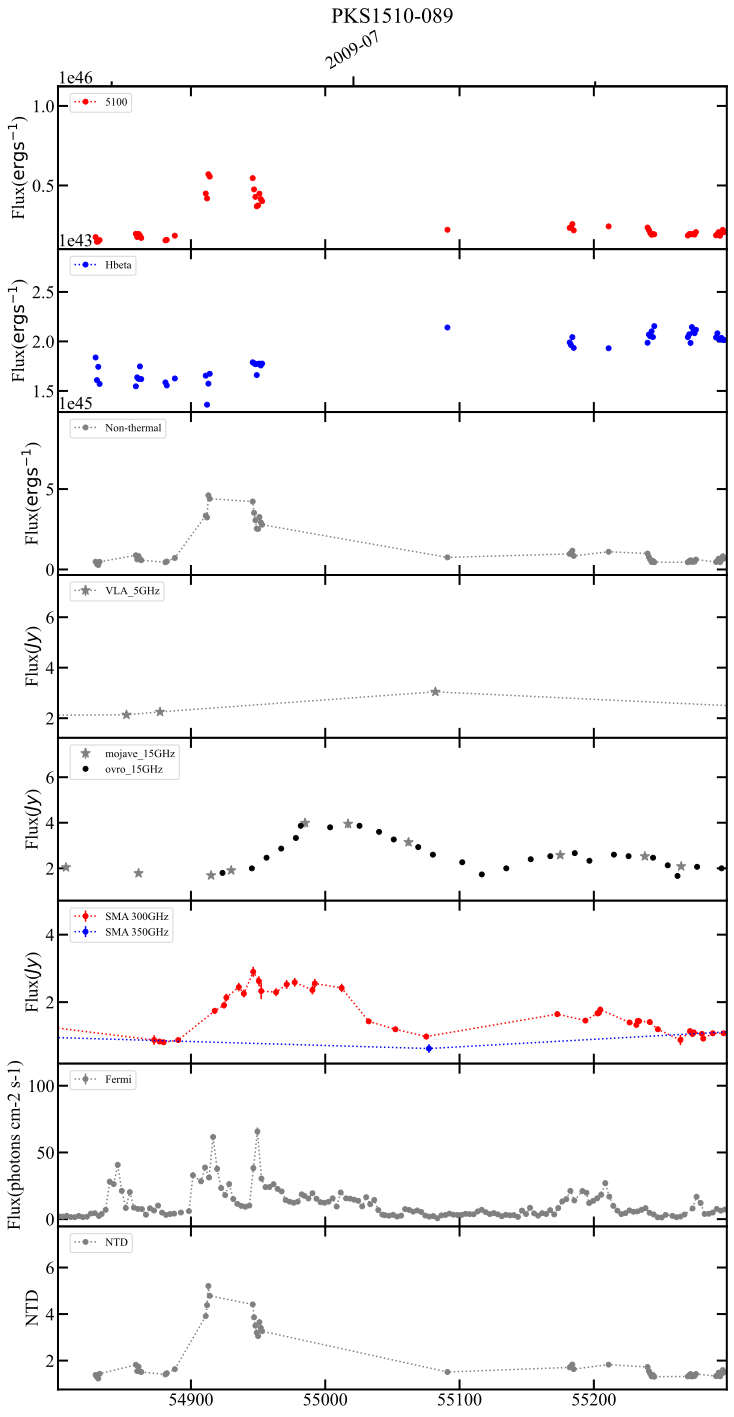

In [229]:
figure_n= 8

fig = plt.figure(figsize=(12,figure_n*3))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)

ax = fig.add_subplot(figure_n,1,1)

for i in range(len(data_PKS1510)):
    
    ax.errorbar(data_PKS1510['MJD'][i],data_PKS1510['F5100'][i]*flux_scale_5100_PKS1510*5100,
              ls=':',marker='.',color='r',markersize=10,label='5100')
ax.set_title('PKS1510-089')
ax.set_xlabel(r'MJD(d)')
ax.set_ylabel(r'Flux($\mathrm{erg s^{-1}}$)')
    
##########################################    
ax2 = fig.add_subplot(figure_n,1,2,sharex=ax)
for i in range(len(data_PKS1510)):
    #print(data_PKS1510['MJD'][i],data_PKS1510['FHb'][i]*flux_scale_Hbeta_PKS1510)    
    ax2.errorbar(data_PKS1510['MJD'][i],data_PKS1510['FHb'][i]*flux_scale_Hbeta_PKS1510,
              ls=':',marker='.',color='blue',markersize=10,label='Hbeta')

ax2.set_ylabel(r'Flux($\mathrm{erg s^{-1}}$)')
    

#x=np.log10(data_PKS1510[flux_label_PKS1510]*flux_scale_5100_PKS1510*5100)
#y=np.log10(data_PKS1510[flux_label_1_PKS1510]*flux_scale_Hbeta_PKS1510)
##########################################
ax3 = fig.add_subplot(figure_n,1,3,sharex=ax)
ax3.errorbar(data_PKS1510['MJD'],data_PKS1510['L5100minusLp'],
              ls=':',marker='.',markersize=10,color='grey',label='Non-thermal')
ax3.set_ylabel(r'Flux($\mathrm{erg s^{-1}}$)')

##########################################
ax3_1 = fig.add_subplot(figure_n,1,4,sharex=ax)
ax3_1.errorbar(lagtable_ATCA_PKS1510_5GHz['t'],lagtable_ATCA_PKS1510_5GHz['flux'],lagtable_ATCA_PKS1510_5GHz['e_flux'],
              ls=':',marker='*',markersize=10,color='grey',label='VLA_5GHz')

ax3_1.set_ylabel(r'Flux($Jy$)')

##########################################
ax3_2 = fig.add_subplot(figure_n,1,5,sharex=ax)
ax3_2.errorbar(mojave_15GHz_PKS1510['mjd'],mojave_15GHz_PKS1510['flux'],mojave_15GHz_PKS1510['err'],
              ls='',marker='*',markersize=10,color='grey',label='mojave_15GHz')
ax3_2.errorbar(table_OVRO_PKS1510_extract['mjd'],table_OVRO_PKS1510_extract['flux_15GHZ_ovro'],
            #mojave_15GHz_PKS1510['err'],
            ls='',marker='.',markersize=10,color='black',label='ovro_15GHz')
ax3_2.set_ylabel(r'Flux($Jy$)')

##########################################
ax3_3 = fig.add_subplot(figure_n,1,6,sharex=ax)
ax3_3.errorbar(SMA_PKS1510_1mm['mjd'],SMA_PKS1510_1mm['FLUX(JY)'],SMA_PKS1510_1mm['ERROR'],
              ls=':',marker='.',markersize=10,color='r',label='SMA 300GHz')
ax3_3.errorbar(SMA_PKS1510_850['mjd'],SMA_PKS1510_850['FLUX(JY)'],SMA_PKS1510_850['ERROR'],
              ls=':',marker='.',markersize=10,color='b',label='SMA 350GHz')

ax3_3.set_ylabel(r'Flux($Jy$)')

##########################################
ax3_4 = fig.add_subplot(figure_n,1,figure_n-1,sharex=ax)
ax3_4.errorbar(lagdata_PKS1510_Fermi['t'],
               lagdata_PKS1510_Fermi['flux'],
               lagdata_PKS1510_Fermi['e_flux'],
              ls=':',marker='.',markersize=10,color='grey',label='Fermi')
ax3_4.set_ylabel(r'Flux(photons cm-2 s-1)')


##########################################
ax4 = fig.add_subplot(figure_n,1,figure_n,sharex=ax)
ax4.errorbar(data_PKS1510['MJD'],data_PKS1510['NTD'],
              ls=':',marker='.',markersize=10,color='grey',label='NTD')
ax4.set_ylabel(r'NTD')



set_ax_tick(ax) 
set_ax_tick(ax2) 
set_ax_tick(ax3) 
set_ax_tick(ax3_1) 
set_ax_tick(ax3_2) 
set_ax_tick(ax3_3) 
set_ax_tick(ax3_4) 
set_ax_tick(ax4) 

set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax2,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax3,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax3_1,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax3_2,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax3_3,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax3_4,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax4,bbox_to_anchor=(0.01, 0.99))


plot_secax(ax,mi_interval=180,ma_interval=360,rotation=30) 

range_l,range_r=(54800+1,55300-1)

ax.set_xlim(range_l,range_r)

save_lc_img_path='/Users/lyubing/IHEPBox/JetRM_plot/PKS1510_plot/Spec_PKS1510_lc_%d_%d.png'%(range_l,range_r)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_I_lc.png'
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
#plt.close()




In [ ]:
figure_n= 3

fig = plt.figure(figsize=(12,figure_n*3))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)

ax = fig.add_subplot(figure_n,1,1)

for i in range(len(data_PKS1510)):   
    ax.errorbar(data_PKS1510['MJD'][i],data_PKS1510['F5100'][i]*flux_scale_5100_PKS1510*5100,
              ls=':',marker='.',color='r',markersize=10,label='5100')
ax.set_title('PKS1510-089')
ax.set_xlabel(r'MJD(d)')
ax.set_ylabel(r'Flux($\mathrm{erg s^{-1}}$)')
    
ax2 = fig.add_subplot(figure_n,1,2,sharex=ax)    
data_plot=lag_PKS1510_15GHz_combine
ax2.errorbar(data_plot[data_plot.columns[0]],
             data_plot[data_plot.columns[1]],
             data_plot[data_plot.columns[2]]
             , marker = 'o', linestyle = ':', color = 'cyan', 
             label = '15GHz' )
ax2.set_ylabel(r'Flux ($\mathrm{Jy}$)')
    
    
ax3 = fig.add_subplot(figure_n,1,figure_n,sharex=ax)    
data_plot=lagdata_PKS1510_Pol_optical
ax3.errorbar(data_plot[data_plot.columns[0]],
             data_plot[data_plot.columns[1]],
             data_plot[data_plot.columns[2]]
             , marker = 'o', linestyle = ':', color = 'r', 
             label = data_plot.columns[1] )
ax3.set_ylabel(r'degree')

##########################################




set_ax_tick(ax) 
set_ax_tick(ax2) 
set_ax_tick(ax3) 

set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax2,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax3,bbox_to_anchor=(0.01, 0.99))


plot_secax(ax,mi_interval=180,ma_interval=360,rotation=30) 

range_l,range_r=(54800+1,55300-1)
ax.set_xlim(range_l,range_r)
save_lc_img_path='/Users/lyubing/IHEPBox/JetRM_plot/PKS1510_plot/Spec_PKS1510_lc3_%d_%d.png'%(range_l,range_r)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_I_lc.png'
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
#plt.close()




In [ ]:
min(data_PKS1510['MJD']),max(data_PKS1510['MJD'])

data_PKS1510['MJD'][:10]

lagdata_PKS1510_Pol_optical['t'][:10]

In [ ]:
lag_PKS1510_15GHz_combine.columns

### fit_radio_lc

In [387]:
from astropy.modeling import Fittable1DModel, Parameter
from astropy.modeling import models
from astropy.modeling.models import Linear1D,Gaussian1D
from astropy.modeling.models import custom_model
from astropy.modeling.models import Const1D

In [214]:
range_l,range_r=(54928,55300-1)
t=lag_PKS1510_15GHz_combine['t']
mask_range=np.logical_and(t >= range_l, t < range_r)

lag_PKS1510_15GHz_combine_select=lag_PKS1510_15GHz_combine[mask_range]

t_fit=lag_PKS1510_15GHz_combine_select['t']-54800
flux_fit=lag_PKS1510_15GHz_combine_select['flux']

#lag_PKS1510_15GHz_combine_select

gauss1 = models.Gaussian1D(amplitude=3., mean=200, stddev=1.,
                              bounds={"mean": (150, 250.0),"amplitude":(0.1,10),"stddev":(1,1000)}
                          )

gauss2 = models.Gaussian1D(amplitude=3., mean=400, stddev=1.,
                              bounds={"mean": (350, 450.0),"amplitude":(1,5),"stddev":(1,1000)}
                          )

#linear1 = LineModel(slope=-0.1, intercept=2.0)
linear1 = Linear1D(slope=0.1, intercept=2.0,
                 bounds={"slope": (-0.1, 0.1)}
                )

func_combine=gauss1+gauss2#+linear1
fit_g_combine = fitting.LevMarLSQFitter()
g_combine  = fit_g_combine(func_combine, t_fit,flux_fit)

In [215]:
print(g_combine)

Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Gaussian1D(amplitude=3.7458503, mean=205.23490792, stddev=56.37161899)>

    [1]: <Gaussian1D(amplitude=2.55545055, mean=408.64015298, stddev=94.35170132)>
Parameters:
       amplitude_0          mean_0            stddev_0         amplitude_1          mean_1           stddev_1    
    ----------------- ------------------ ------------------ ----------------- ----------------- -----------------
    3.745850295864637 205.23490791563162 56.371618989292855 2.555450546499089 408.6401529758928 94.35170132352482


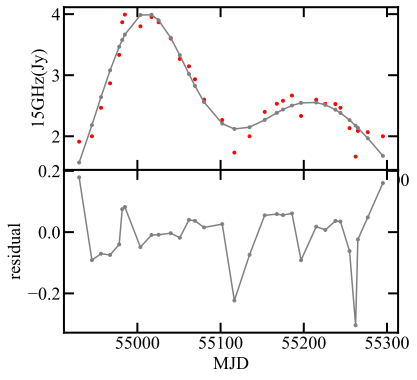

In [217]:
figure_n= 2

fig = plt.figure(figsize=(6,figure_n*3))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)

ax = fig.add_subplot(figure_n,1,1)
ax.scatter(t_fit+54800,flux_fit,color='r',marker='.')
ax.plot(t_fit+54800,g_combine(t_fit),color='grey',marker='.')
ax.set_ylabel('15GHz(Jy)')

ax2 = fig.add_subplot(figure_n,1,2,sharex=ax)
ax2.plot(t_fit+54800,(flux_fit-g_combine(t_fit))/flux_fit,color='grey',marker='.')
ax2.set_ylabel('residual')

ax2.set_xlabel('MJD')
set_ax_tick(ax)
set_ax_tick(ax2)
plt.show()


In [409]:
@custom_model
def const3d(x, y, z, amp=1):
    return amp

@custom_model
def const1d(x, amp=1):
    return amp

class subflareModel(Fittable1DModel):
    F0 = Parameter()
    t0 = Parameter()
    Tr = Parameter()
    Td = Parameter()
    #Fb = Parameter()
    
    linear = True

    @staticmethod
    def evaluate(t,F0,t0,Tr,Td):
        return 2*F0*(np.exp((t0-t)/Tr)+np.exp((t-t0)/Td))**(-1.0)#+Fb
    


In [406]:
range_l,range_r=(54928,55300-1)
t=lag_PKS1510_15GHz_combine['t']
mask_range=np.logical_and(t >= range_l, t < range_r)

lag_PKS1510_15GHz_combine_select=lag_PKS1510_15GHz_combine[mask_range]

t_fit=lag_PKS1510_15GHz_combine_select['t']#-54800
flux_fit=lag_PKS1510_15GHz_combine_select['flux']


smodel_1=subflareModel(1,55000,1,2)
smodel_2=subflareModel(1,55200,1,2)
const1D=Const1D(1)
#Const1D = custom_model(const1d)
#Const3D = custom_model(const3d)

smodel=smodel_1+smodel_2+const1D
fit_lightcurve = fitting.LevMarLSQFitter()
fit_lc = fit_lightcurve(smodel, t_fit, flux_fit)


/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_49862/114764571.py:12: RuntimeWarning: invalid value encountered in reciprocal
  return 2*F0*(np.exp((t0-t)/Tr)+np.exp((t-t0)/Td))**(-1.0)#+Fb


In [407]:
fit_lc 

<CompoundModel(F0_0=2.56480564, t0_0=54997.34897289, Tr_0=0.10968409, Td_0=4.41763585, F0_1=3.82841981, t0_1=55202.14711239, Tr_1=1.81444013, Td_1=5.82100518, amplitude_2=1.8671691)>

/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_49862/114764571.py:12: RuntimeWarning: overflow encountered in exp
  return 2*F0*(np.exp((t0-t)/Tr)+np.exp((t-t0)/Td))**(-1.0)#+Fb


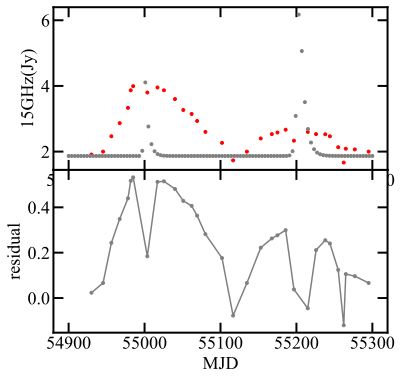

In [408]:
figure_n= 2

fig = plt.figure(figsize=(6,figure_n*3))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)

ax = fig.add_subplot(figure_n,1,1)
ax.scatter(t_fit,flux_fit,color='r',marker='.')
#ax.plot(t_fit,fit_lc(t_fit),color='grey',marker='.')
t_lin=np.linspace(54900,55300,100)
ax.plot(t_lin,fit_lc(t_lin),color='grey',marker='.',ls='',label='fit')
ax.set_ylabel('15GHz(Jy)')

ax2 = fig.add_subplot(figure_n,1,2,sharex=ax)
ax2.plot(t_fit,(flux_fit-fit_lc(t_fit))/flux_fit,color='grey',marker='.')
ax2.set_ylabel('residual')

ax2.set_xlabel('MJD')
set_ax_tick(ax)
set_ax_tick(ax2)
plt.show()


In [420]:
import sys

In [421]:
pwd

'/Users/lyubing/blog/brettlv.github.io/pythoncode/00JetRM'

In [419]:
%cd /Users/lyubing/blog/brettlv.github.io/pythoncode/00JetRM

/Users/lyubing/blog/brettlv.github.io/pythoncode/00JetRM


### fit_Fermi_lc

In [422]:
from stingray import Lightcurve

In [423]:
lc_fermi = Lightcurve(np.array(lagdata_PKS1510_Fermi['t']), np.array(lagdata_PKS1510_Fermi['flux']),dt=3, skip_checks=True)

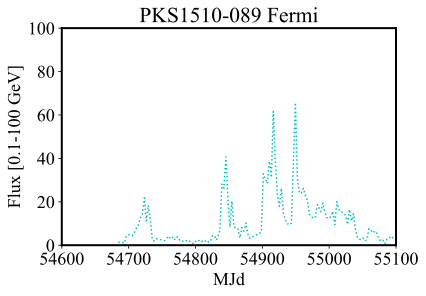

In [426]:
lc_fermi.plot(labels=('MJd', "Flux [0.1-100 GeV]"),  # (xlabel, ylabel)
        #axis=(0, 1000, -50, 150),  # (xmin, xmax, ymin, ymax)
        axis=(54600, 55100,0,100),
        title="PKS1510-089 Fermi",
        marker='c:')
        #marker = 'k', save=True, filename="lightcurve.png" 

In [425]:
lc_fermi.dt

3

In [ ]:
#lc_fermi.

lc_fermi_rebinned_30 = lc_fermi.rebin(31)

lc_fermi_rebinned_30.plot( 
        title="PKS1510-089 Fermi",
        marker='c:')

lc_fermi_rebinned_30.dt

lc_fermi_rebinned_30.counts



time = np.hstack([np.arange(0, 10, 0.1), np.arange(10, 20, 0.3)]) # uneven time resolution
counts = np.random.poisson(100, size=len(time))

lc = Lightcurve(time, counts, dt=1.0, skip_checks=True)
lc.plot(marker='c:')

In [428]:
lc_fermi.time

array([54684.5, 54687.5, 54690.5, ..., 59796.5, 59799.5, 59802.5])

In [457]:
t_mask_fermi= np.logical_and(lc_fermi.time>54900,lc_fermi.time<54960,)
t_fit_fermi=lc_fermi.time[t_mask_fermi]
flux_fit_fermi=lc_fermi.countrate[t_mask_fermi]


smodel_1=subflareModel(1,54920,1,2)
smodel_2=subflareModel(1,54950,1,2)
const1D=Const1D(1)
#Const1D = custom_model(const1d)
#Const3D = custom_model(const3d)

smodel=smodel_1+smodel_2+const1D
fit_lightcurve = fitting.LevMarLSQFitter()
fit_lc_fermi = fit_lightcurve(smodel, t_fit_fermi, flux_fit_fermi)


/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_49862/114764571.py:12: RuntimeWarning: invalid value encountered in reciprocal
  return 2*F0*(np.exp((t0-t)/Tr)+np.exp((t-t0)/Td))**(-1.0)#+Fb


In [458]:
fit_lc_fermi

<CompoundModel(F0_0=7.15856588, t0_0=54922.2529539, Tr_0=21.09105262, Td_0=1.26191856, F0_1=6.50316224, t0_1=54945.03743803, Tr_1=1.90193916, Td_1=10.24173512, amplitude_2=4.19880358)>

/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_49862/114764571.py:12: RuntimeWarning: invalid value encountered in reciprocal
  return 2*F0*(np.exp((t0-t)/Tr)+np.exp((t-t0)/Td))**(-1.0)#+Fb
/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_49862/114764571.py:12: RuntimeWarning: invalid value encountered in reciprocal
  return 2*F0*(np.exp((t0-t)/Tr)+np.exp((t-t0)/Td))**(-1.0)#+Fb


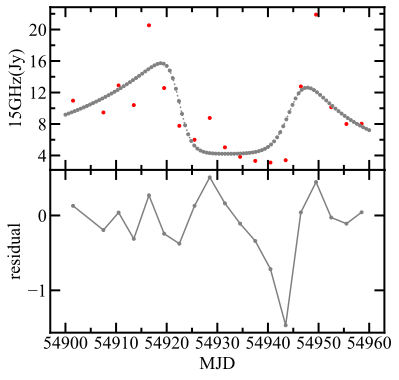

In [459]:
figure_n= 2

fig = plt.figure(figsize=(6,figure_n*3))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)

ax = fig.add_subplot(figure_n,1,1)
ax.scatter(t_fit_fermi,flux_fit_fermi,color='r',marker='.')
#ax.plot(t_fit,fit_lc(t_fit),color='grey',marker='.')
t_lin=np.linspace(54900,54960,100)
ax.plot(t_lin,fit_lc_fermi(t_lin),color='grey',marker='.',ls=':',label='fit')
ax.set_ylabel('15GHz(Jy)')

ax2 = fig.add_subplot(figure_n,1,2,sharex=ax)
ax2.plot(t_fit_fermi,(flux_fit_fermi-fit_lc_fermi(t_fit_fermi))/flux_fit_fermi,color='grey',marker='.')
ax2.set_ylabel('residual')

ax2.set_xlabel('MJD')
set_ax_tick(ax)
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',labelsize=0)
set_ax_tick(ax2)
set_ax_locator(ax,10,5,4,2)

plt.show()


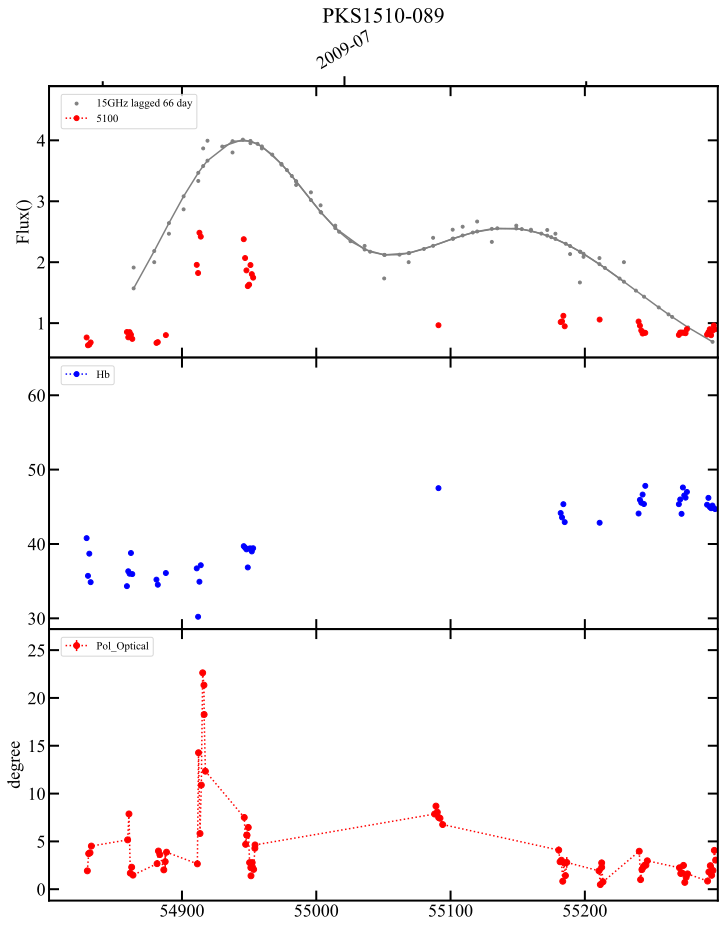

In [223]:
figure_n= 3

fig = plt.figure(figsize=(12,figure_n*5))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)

ax = fig.add_subplot(figure_n,1,1)

for i in range(len(data_PKS1510)):   
    ax.errorbar(data_PKS1510['MJD'][i],data_PKS1510['F5100'][i]#*flux_scale_5100_PKS1510*5100
                ,ls=':',marker='.',color='r',markersize=10,label='5100')
    

    
ax.set_title('PKS1510-089')
ax.set_xlabel(r'MJD(d)')
#ax.set_ylabel(r'Flux($\mathrm{erg s^{-1}}$)')
ax.set_ylabel(r'Flux($\mathrm{}$)')    
    
ax2 = fig.add_subplot(figure_n,1,2,sharex=ax) 
for i in range(len(data_PKS1510)):   
    ax2.errorbar(data_PKS1510['MJD'][i],data_PKS1510['FHb'][i]#*flux_scale_5100_PKS1510*5100
                ,ls=':',marker='.',color='b',markersize=10,label='Hb')

    
    
ax3 = fig.add_subplot(figure_n,1,figure_n,sharex=ax)    
data_plot=lagdata_PKS1510_Pol_optical
ax3.errorbar(data_plot[data_plot.columns[0]],
             data_plot[data_plot.columns[1]],
             data_plot[data_plot.columns[2]]
             , marker = 'o', linestyle = ':', color = 'r', 
             label = data_plot.columns[1] )
ax3.set_ylabel(r'degree')

##########################################
radio_lag_optical=66
ax.scatter(t_fit+54800-radio_lag_optical,flux_fit,color='grey',marker='.',label='15GHz lagged %d day'%radio_lag_optical)
ax.plot(t_fit+54800,g_combine(t_fit+radio_lag_optical),color='grey',marker='.')
ax.plot(t_fit+54800-radio_lag_optical,g_combine(t_fit),color='grey',marker='.')



set_ax_tick(ax) 
set_ax_tick(ax2) 
set_ax_tick(ax3) 

set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax2,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax3,bbox_to_anchor=(0.01, 0.99))


plot_secax(ax,mi_interval=180,ma_interval=360,rotation=30) 

range_l,range_r=(54800+1,55300-1)
ax.set_xlim(range_l,range_r)
save_lc_img_path='/Users/lyubing/IHEPBox/JetRM_plot/PKS1510_plot/Spec_PKS1510_lc2_%d_%d.png'%(range_l,range_r)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_I_lc.png'
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
#plt.close()




In [ ]:
lagdata_PKS1510_Pol_optical.columns

data_PKS1510

In [ ]:
lagdata_a

In [ ]:
radio_lag_optical=66

for i in range(len(data_PKS1510)):   
    t_i=data_PKS1510['MJD'][i]
    L5100_i=data_PKS1510['F5100'][i]*flux_scale_5100_PKS1510*5100
    logL5100_i=np.log10(L5100_i)
    
    contri_from_Jet=g_combine(t_i-54800+radio_lag_optical)
    
    pol_t_i_index=  np.argmin(abs(lagdata_PKS1510_Pol_optical['t']-t_i))
    pol_t_i=lagdata_PKS1510_Pol_optical.loc[pol_t_i_index,'t']
    
    if abs(pol_t_i-t_i)<1:
        Pol_t_i=lagdata_PKS1510_Pol_optical.loc[pol_t_i_index,'Pol_Optical']
    else:
        Pol_t_i=0
    print(t_i,L5100_i,contri_from_Jet,pol_t_i,Pol_t_i)    
        

lagdata_PKS1510_Pol_optical

In [ ]:
g_combine()

range_l,range_r=(54828,55300-1)

t=lag_PKS1510_5100['t']
mask_range=np.logical_and(t >= range_l, t < range_r)

lag_PKS1510_5100_select=lag_PKS1510_5100[mask_range]

t_fit=lag_PKS1510_5100_select['t']-54800
flux_fit=lag_PKS1510_5100_select['flux']


gauss1 = models.Gaussian1D(amplitude=3., mean=150, stddev=1.,
                              bounds={"mean": (50, 200.0),"amplitude":(0.1,10),"stddev":(1,1000)}
                          )

gauss2 = models.Gaussian1D(amplitude=3., mean=400, stddev=1.,
                              bounds={"mean": (350, 450.0),"amplitude":(1,5),"stddev":(1,1000)}
                          )

#linear1 = LineModel(slope=-0.1, intercept=2.0)
linear1 = Linear1D(slope=0.1, intercept=2.0,
                 bounds={"slope": (-0.1, 0.1)}
                )

func_combine=gauss1#+linear1#+gauss2#+linear1
fit_g_combine = fitting.LevMarLSQFitter()
g_combine  = fit_g_combine(func_combine, t_fit,flux_fit)
print(g_combine)



figure_n= 2

fig = plt.figure(figsize=(6,figure_n*3))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)

ax = fig.add_subplot(figure_n,1,1)
ax.scatter(t_fit,flux_fit,color='r',marker='.')
ax.set_ylabel('F5100 ')

ax2 = fig.add_subplot(figure_n,1,2,sharex=ax)
ax2.plot(t_fit,(flux_fit-g_combine(t_fit))/flux_fit,color='grey',marker='.')
ax2.set_ylabel('residual')
M
set_ax_tick(ax)
set_ax_tick(ax2)
plt.show()


In [ ]:
!open /Users/lyubing/IHEPBox/JetRM_plot/PKS1510_plot/

### Pol_PKS1510_plot

In [ ]:
figure_n= 6

fig = plt.figure(figsize=(12,figure_n*3))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)

ax = fig.add_subplot(figure_n,1,1)

for i in range(len(data_PKS1510)):
    
    ax.errorbar(data_PKS1510['MJD'][i],data_PKS1510['F5100'][i]*flux_scale_5100_PKS1510*5100,
              ls=':',marker='.',color='r',markersize=10,label='5100')

    
ax_0 = fig.add_subplot(figure_n,1,2)
for i in range(len(data_PKS1510)):
    #print(data_PKS1510['MJD'][i],data_PKS1510['FHb'][i]*flux_scale_Hbeta_PKS1510)    
    ax_0.errorbar(data_PKS1510['MJD'][i],data_PKS1510['FHb'][i]*flux_scale_Hbeta_PKS1510,
              ls=':',marker='.',color='blue',markersize=10,label='Hbeta')

    
ax.set_title('PKS1510-089')
ax.set_xlabel(r'MJD(d)')
ax.set_ylabel(r'Flux($\mathrm{erg s^{-1}}$)')
  
ax_1 = fig.add_subplot(figure_n,1,figure_n-3)
data_plot=lagdata_PKS1510_V  
ax_1.errorbar(data_plot[data_plot.columns[0]],
             data_plot[data_plot.columns[1]],
             data_plot[data_plot.columns[2]]
             , marker = 'o', linestyle = ':', color = 'r', 
             label = data_plot.columns[1] )


ax2 = fig.add_subplot(figure_n,1,figure_n-2)    
data_plot=lagdata_PKS1510_Pol_optical
ax2.errorbar(data_plot[data_plot.columns[0]],
             data_plot[data_plot.columns[1]],
             data_plot[data_plot.columns[2]]
             , marker = 'o', linestyle = ':', color = 'r', 
             label = data_plot.columns[1] )


    
##########################################    
ax3 = fig.add_subplot(figure_n,1,figure_n,sharex=ax)
ax3.errorbar(mojave_15GHz_PKS1510['mjd'],mojave_15GHz_PKS1510['flux'],mojave_15GHz_PKS1510['err'],
              ls='',marker='*',markersize=10,color='grey',label='mojave_15GHz')
ax3.errorbar(table_OVRO_PKS1510_extract['mjd'],table_OVRO_PKS1510_extract['flux_15GHZ_ovro'],
            #mojave_15GHz_PKS1510['err'],
            ls='',marker='.',markersize=10,color='black',label='ovro_15GHz')
ax3.set_ylabel(r'Flux($Jy$)')
    
    
    

#x=np.log10(data_PKS1510[flux_label_PKS1510]*flux_scale_5100_PKS1510*5100)
#y=np.log10(data_PKS1510[flux_label_1_PKS1510]*flux_scale_Hbeta_PKS1510)
##########################################
#ax4 = fig.add_subplot(figure_n,1,4,sharex=ax)
data_plot=lagdata_PKS1510_VLBA_Pol
ax3.errorbar(data_plot[data_plot.columns[0]],
             data_plot[data_plot.columns[1]],
             data_plot[data_plot.columns[2]]
             , marker = 'o', linestyle = ':', color = 'cyan', 
             label = data_plot.columns[1] )


##########################################

ax4 = fig.add_subplot(figure_n,1,figure_n-1,sharex=ax)
ax4.errorbar(lagdata_PKS1510_Fermi['t'],
               lagdata_PKS1510_Fermi['flux'],
               lagdata_PKS1510_Fermi['e_flux'],
              ls=':',marker='.',markersize=10,color='grey',label='Fermi')
ax4.set_ylabel(r'Flux(photons cm-2 s-1)')



#ax.semilogy()
set_ax_tick(ax) 
set_ax_tick(ax_0) 
set_ax_tick(ax_1) 
set_ax_tick(ax2) 
set_ax_tick(ax3) 
set_ax_tick(ax4) 

set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax_0,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax_1,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax2,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax3,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax4,bbox_to_anchor=(0.01, 0.99))


plot_secax(ax,mi_interval=180,ma_interval=360,rotation=30) 

range_l,range_r=(54800+1,55409)

ax.set_xlim(range_l,range_r)

save_lc_img_path='/Users/lyubing/IHEPBox/JetRM_plot/PKS1510_plot/Spec_PKS1510_pol_%d_%d.png'%(range_l,range_r)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_I_lc.png'
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
#plt.close()




In [152]:
table_UMRAO_PKS1510_14dot5GHz.columns

Index(['Julian_Day', 'YYYYMMDD', 'Freq.', 'U.T.', 'S', 'SigS', 'P', 'SigP',
       'Xi', 'SigXi', 'N', 'mjd'],
      dtype='object')

### optical_plot

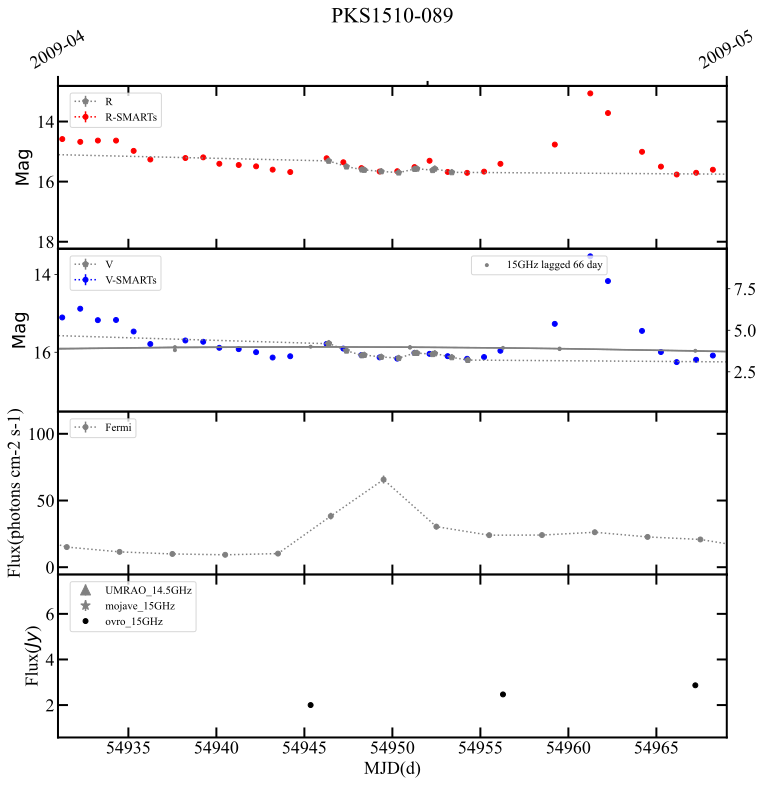

In [358]:
figure_n= 4

fig = plt.figure(figsize=(12,figure_n*3))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)

ax = fig.add_subplot(figure_n,1,1)

for i in range(len(SMARTS_PKS1510)):
    if SMARTS_PKS1510['col9'][i]!=999:
        ax.errorbar(SMARTS_PKS1510['col8'][i]-2400000.5,
                SMARTS_PKS1510['col9'][i],
                yerr=SMARTS_PKS1510['col10'][i],
               ls=':',marker='.',color='r',markersize=10,label='R-SMARTs')

ax.errorbar(data_PKS1510_R[data_PKS1510_R.columns[3]],
                          data_PKS1510_R[data_PKS1510_R.columns[1]],
                          yerr= data_PKS1510_R[data_PKS1510_R.columns[2]],
                          ls=':',marker='p',color='grey',markersize=6,label='R'
                                               )
            
    
ax_0 = fig.add_subplot(figure_n,1,2,sharex=ax)
for i in range(len(SMARTS_PKS1510)):
    if SMARTS_PKS1510['col6'][i]!=999:
        ax_0.errorbar(SMARTS_PKS1510['col5'][i]-2400000.5,
                SMARTS_PKS1510['col6'][i],
                yerr=SMARTS_PKS1510['col7'][i],
               ls=':',marker='.',color='b',markersize=10,label='V-SMARTs')

ax_0.errorbar(data_PKS1510_V[data_PKS1510_V.columns[3]],
                          data_PKS1510_V[data_PKS1510_V.columns[1]],
                          yerr= data_PKS1510_V[data_PKS1510_V.columns[2]],
                          ls=':',marker='p',color='grey',markersize=6,label='V'
                                               )
ax_2=ax_0.twinx()
radio_lag_optical=66
ax_2.scatter(t_fit+54800-radio_lag_optical,flux_fit,color='grey',marker='.',label='15GHz lagged %d day'%radio_lag_optical)
ax_2.plot(t_fit+54800,g_combine(t_fit+radio_lag_optical),color='grey',marker='.')
ax_2.plot(t_fit+54800-radio_lag_optical,g_combine(t_fit),color='grey',marker='.')




ax3_4 = fig.add_subplot(figure_n,1,3,sharex=ax)
ax3_4.errorbar(lagdata_PKS1510_Fermi['t'],
               lagdata_PKS1510_Fermi['flux'],
               lagdata_PKS1510_Fermi['e_flux'],
              ls=':',marker='.',markersize=10,color='grey',label='Fermi')
ax3_4.set_ylabel(r'Flux(photons cm-2 s-1)')


ax3_2 = fig.add_subplot(figure_n,1,4,sharex=ax)
ax3_2.errorbar(mojave_15GHz_PKS1510['mjd'],mojave_15GHz_PKS1510['flux'],mojave_15GHz_PKS1510['err'],
              ls='',marker='*',markersize=10,color='grey',label='mojave_15GHz')
ax3_2.errorbar(table_OVRO_PKS1510_extract['mjd'],table_OVRO_PKS1510_extract['flux_15GHZ_ovro'],
            #mojave_15GHz_PKS1510['err'],
            ls='',marker='.',markersize=10,color='black',label='ovro_15GHz')

ax3_2.errorbar(table_UMRAO_PKS1510_14dot5GHz['mjd'],
               table_UMRAO_PKS1510_14dot5GHz['S'],
               table_UMRAO_PKS1510_14dot5GHz['SigS'],
               ls='',marker='^',markersize=10,color='grey',label='UMRAO_14.5GHz')
ax3_2.set_ylabel(r'Flux($Jy$)')
        




ax.set_title('PKS1510-089')

ax.set_ylabel(r'$\mathrm{Mag}$')
ax_0.set_ylabel(r'$\mathrm{Mag}$')
ax3_2.set_xlabel(r'MJD(d)')

bottom, top = ax.set_ylim()
if bottom< top:
    ax.set_ylim(top,bottom)
    
bottom, top = ax_0.set_ylim()
if bottom< top:
    ax_0.set_ylim(top,bottom)

#ax.semilogy()
set_ax_tick(ax) 
#set_ax_tick(ax_0) 
#set_ax_tick(ax_2) 
set_ax_tick(ax3_2) 
set_ax_tick(ax3_4) 

set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax_0,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax_2,bbox_to_anchor=(0.61, 0.99))

set_ax_legend(ax3_2,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax3_4,bbox_to_anchor=(0.01, 0.99))


plot_secax(ax,mi_interval=60,ma_interval=180,rotation=30) 

range_l,range_r=(54930+1,54970-1)

ax.set_xlim(range_l,range_r)
ax_2.set_ylim(0.1,9.9)

save_lc_img_path='/Users/lyubing/IHEPBox/JetRM_plot/PKS1510_plot/PKS1510_SMARTS_%d_%d.png'%(range_l,range_r)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_I_lc.png'
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
#plt.close()




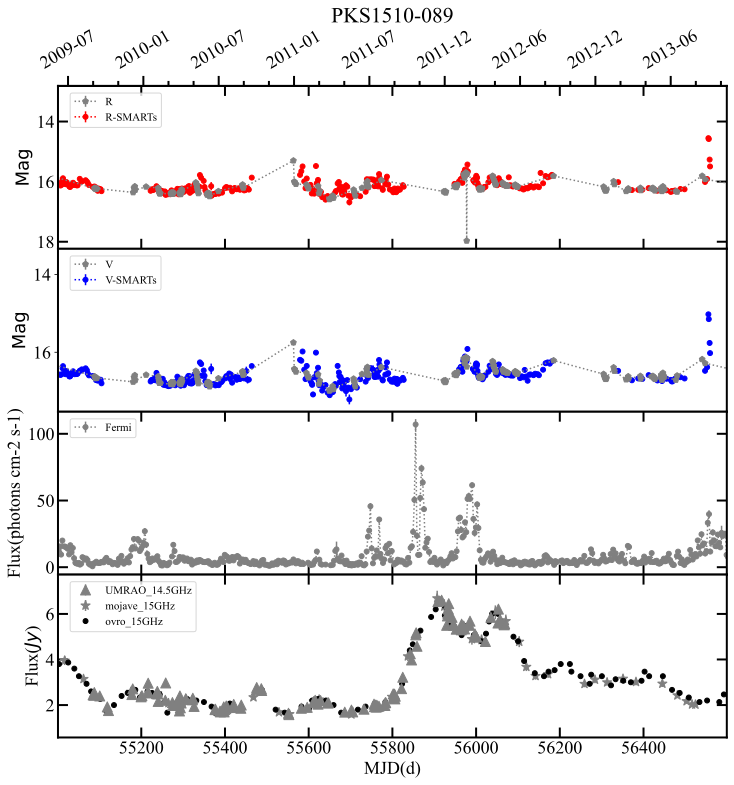

In [271]:
figure_n= 4

fig = plt.figure(figsize=(12,figure_n*3))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)

ax = fig.add_subplot(figure_n,1,1)

for i in range(len(SMARTS_PKS1510)):
    if SMARTS_PKS1510['col9'][i]!=999:
        ax.errorbar(SMARTS_PKS1510['col8'][i]-2400000.5,
                SMARTS_PKS1510['col9'][i],
                yerr=SMARTS_PKS1510['col10'][i],
               ls=':',marker='.',color='r',markersize=10,label='R-SMARTs')

ax.errorbar(data_PKS1510_R[data_PKS1510_R.columns[3]],
                          data_PKS1510_R[data_PKS1510_R.columns[1]],
                          yerr= data_PKS1510_R[data_PKS1510_R.columns[2]],
                          ls=':',marker='p',color='grey',markersize=6,label='R'
                                               )
            
    
ax_0 = fig.add_subplot(figure_n,1,2,sharex=ax)
for i in range(len(SMARTS_PKS1510)):
    if SMARTS_PKS1510['col6'][i]!=999:
        ax_0.errorbar(SMARTS_PKS1510['col5'][i]-2400000.5,
                SMARTS_PKS1510['col6'][i],
                yerr=SMARTS_PKS1510['col7'][i],
               ls=':',marker='.',color='b',markersize=10,label='V-SMARTs')

ax_0.errorbar(data_PKS1510_V[data_PKS1510_V.columns[3]],
                          data_PKS1510_V[data_PKS1510_V.columns[1]],
                          yerr= data_PKS1510_V[data_PKS1510_V.columns[2]],
                          ls=':',marker='p',color='grey',markersize=6,label='V'
                                               )
'''ax_2=ax_0.twinx()
radio_lag_optical=66
ax_2.scatter(t_fit+54800-radio_lag_optical,flux_fit,color='grey',marker='.',label='15GHz lagged %d day'%radio_lag_optical)
ax_2.plot(t_fit+54800,g_combine(t_fit+radio_lag_optical),color='grey',marker='.')
ax_2.plot(t_fit+54800-radio_lag_optical,g_combine(t_fit),color='grey',marker='.')
'''



ax3_4 = fig.add_subplot(figure_n,1,3,sharex=ax)
ax3_4.errorbar(lagdata_PKS1510_Fermi['t'],
               lagdata_PKS1510_Fermi['flux'],
               lagdata_PKS1510_Fermi['e_flux'],
              ls=':',marker='.',markersize=10,color='grey',label='Fermi')
ax3_4.set_ylabel(r'Flux(photons cm-2 s-1)')


ax3_2 = fig.add_subplot(figure_n,1,4,sharex=ax)
ax3_2.errorbar(mojave_15GHz_PKS1510['mjd'],mojave_15GHz_PKS1510['flux'],mojave_15GHz_PKS1510['err'],
              ls='',marker='*',markersize=10,color='grey',label='mojave_15GHz')
ax3_2.errorbar(table_OVRO_PKS1510_extract['mjd'],table_OVRO_PKS1510_extract['flux_15GHZ_ovro'],
            #mojave_15GHz_PKS1510['err'],
            ls='',marker='.',markersize=10,color='black',label='ovro_15GHz')

ax3_2.errorbar(table_UMRAO_PKS1510_14dot5GHz['mjd'],
               table_UMRAO_PKS1510_14dot5GHz['S'],
               table_UMRAO_PKS1510_14dot5GHz['SigS'],
               ls='',marker='^',markersize=10,color='grey',label='UMRAO_14.5GHz')
ax3_2.set_ylabel(r'Flux($Jy$)')
        




ax.set_title('PKS1510-089')

ax.set_ylabel(r'$\mathrm{Mag}$')
ax_0.set_ylabel(r'$\mathrm{Mag}$')
ax3_2.set_xlabel(r'MJD(d)')

bottom, top = ax.set_ylim()
if bottom< top:
    ax.set_ylim(top,bottom)
    
bottom, top = ax_0.set_ylim()
if bottom< top:
    ax_0.set_ylim(top,bottom)

#ax.semilogy()
set_ax_tick(ax) 
#set_ax_tick(ax_0) 
#set_ax_tick(ax_2) 
set_ax_tick(ax3_2) 
set_ax_tick(ax3_4) 

set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax_0,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax_2,bbox_to_anchor=(0.61, 0.99))

set_ax_legend(ax3_2,bbox_to_anchor=(0.01, 0.99))
set_ax_legend(ax3_4,bbox_to_anchor=(0.01, 0.99))


plot_secax(ax,mi_interval=60,ma_interval=180,rotation=30) 

range_l,range_r=(55000+1,56600-1)

ax.set_xlim(range_l,range_r)
ax_2.set_ylim(0.1,9.9)

save_lc_img_path='/Users/lyubing/IHEPBox/JetRM_plot/PKS1510_plot/PKS1510_SMARTS_%d_%d.png'%(range_l,range_r)
#save_lc_img_path='/Users/brettlv/Downloads/PKS1510_plot/Mojave_15GHz_I_lc.png'
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
#plt.close()




# PKS 0736

In [164]:
D_cm_PKS0736=cosmo.luminosity_distance(0.189).to(u.cm)
flux_scale_5100_PKS0736=4*np.pi*(D_cm_PKS0736.value)**2*1.0e-15 # erg s−1 cm−2 Å−1
flux_scale_Hbeta_PKS0736=4*np.pi*(D_cm_PKS0736.value)**2*1.0e-15 #erg s−1 cm−2

In [156]:
RMdata_PKS0736=Table.read(os.path.join(lagdata_dir_PKS0736,'lightcurve_table.dat'),format='ascii')

In [157]:
RMdata_PKS0736

<Table length=127>
       MJD            V         flux5100      ...    fbeta_error          fhgamma          fhgammaerror   
     float64       float64      float64       ...      float64            float64            float64      
------------------ ------- ------------------ ... ------------------ ------------------ ------------------
 56988.41362999985   15.09  5.281655578320109 ...  2.810987990973404 11.361715319763206 1.3827305609846134
 56989.38413000014   15.21  5.719122467662428 ...  5.612072721381898 30.875220161529324  5.120942928438652
 56990.46828000015   15.48    6.7216923415431 ... 12.516008556839173  15.98013467053879  4.232456268112058
 57014.38308000006   16.42 1.0632097708215638 ...  3.132716351672922 13.054251622070144 1.6637282960488584
 57015.37910000002   16.38 1.0986114676066188 ...  2.681970698986448  12.33440890378792  1.347678788445108
 57018.36758999992   16.43 1.0662769137000199 ... 2.5725277418800583  9.812923175688091 0.9662744197368124
               ...     ...                ... ...                ...                ...                ...
 58215.17512999987   16.79 0.6326148053829358 ... 2.3081220257454835 10.114579107822035 1.2552329325693823
58216.169619999826   16.55  0.810694206196792 ... 1.7635896899835606 11.993815248528765 1.3024296577216685
58217.158239999786    16.1 0.6379705712538859 ...  2.181526576817246  8.201893760510233 0.9440318160836411
58218.171529999934   16.12 0.9709784564295849 ... 2.0895919430336845 11.249155732165441  1.196240264065675
 58219.17297000019   16.24 0.8003843185881921 ... 1.9194393907936012  9.667731587809405 0.7738572772130804
 58220.20361999981   16.75 0.7881676438215633 ... 1.5432675902205182  9.778085562662753 0.7544728711843214
58250.186439999845   16.84 1.1138741761198216 ...  4.500698137555914 15.454596985870566 2.4168218777579926

## SMARTS_PKS0736

In [205]:
SMARTS_PKS0736=Table.read('%s/0736+01.tab.txt'%lagdata_dir_PKS0736,format='ascii')

In [206]:
SMARTS_PKS0736

<Table length=55>
     col1          col2       col3    col4    col5    col6  ...  col12   col13   col14   col15   col16 
   float64       float64    float64 float64 float64 float64 ... float64 float64 float64 float64 float64
------------- ------------- ------- ------- ------- ------- ... ------- ------- ------- ------- -------
2456986.84132 2456986.84132    15.8   0.005   999.0   999.0 ...   12.64   0.006   999.0   999.0   999.0
2456988.78121 2456988.78121  15.723   0.004   999.0   999.0 ...  12.716   0.005   999.0   999.0   999.0
2456990.81661 2456990.81661  16.032   0.011   999.0   999.0 ...  12.964   0.016   999.0   999.0   999.0
2456991.81216 2456991.81216  16.301   0.006   999.0   999.0 ...  13.007   0.007   999.0   999.0   999.0
2456992.83116 2456992.83116  16.554   0.007   999.0   999.0 ...   999.0   999.0   999.0   999.0   999.0
2456993.82991 2456993.82991  16.716   0.007   999.0   999.0 ...  13.572   0.009   999.0   999.0   999.0
          ...           ...     ...     ...     ...     ... ...     ...     ...     ...     ...     ...
2457145.50726 2457145.50726  17.295    0.03   999.0   999.0 ...  14.448   0.016   999.0   999.0   999.0
2457147.48686 2457147.48686  17.315   0.077   999.0   999.0 ...  14.481   0.047   999.0   999.0   999.0
 2457168.4609  2457168.4609  17.174   0.022   999.0   999.0 ...  14.434   0.021   999.0   999.0   999.0
2457179.44289 2457179.44289   16.35   0.034   999.0   999.0 ...  13.196    0.01   999.0   999.0   999.0
2457180.45462 2457180.45462  16.639   0.014   999.0   999.0 ...  13.561   0.011   999.0   999.0   999.0
2457179.44289 2457179.44289   16.35   0.034   999.0   999.0 ...  13.196    0.01   999.0   999.0   999.0
2457180.45462 2457180.45462  16.639   0.014   999.0   999.0 ...  13.561   0.011   999.0   999.0   999.0

## ovro_PKS0736

In [231]:
table_OVRO_PKS0736_extract=pd.read_csv(os.path.join(lagdata_dir_PKS0736,'PKS0736_ovro_extract.csv'),header=None)
table_OVRO_PKS0736_extract.columns=['mjd','flux_15GHZ_ovro']
table_OVRO_PKS0736_extract['err']=table_OVRO_PKS0736_extract['flux_15GHZ_ovro']*0.05

## plot_PKS0736

# get_data_name(sourcename)

In [ ]:
def get_Rdata_name(name_i):
    Rdata_source=pd.DataFrame([])
    source_Name_i=name_i.strip()
    
    if source_Name_i.startswith('PKS') or \
    source_Name_i.startswith('1ES') or \
    source_Name_i.startswith('1H') or \
    source_Name_i.startswith('AO'):
        source_Name_i_Rband=source_Name_i.replace(' ','')
    
    else:
        source_Name_i_Rband=source_Name_i
        
    source_name_i=Source_name_dict[source_Name_i]
    #source_name=Source_name_dict[source_Name]  
    #Rband_num=0     
    for i in range(10):
        Rphot=pd.read_excel(os.path.join(Rphot_dir,'Rphot_Cycle%d.xlsx'%(i+1)))
        Rphot_name= Rphot[Rphot['Object']==source_Name_i_Rband]
        Rdata_source=Rdata_source.append(Rphot_name,ignore_index=True)
        
    Rdata_source['mjd']=Rdata_source['JD']-2400000.5
        
    return Rdata_source
    

In [ ]:
def get_Vdata_name(name_i):
    
    Rdata_source=pd.DataFrame([])
    source_Name_i=name_i.strip()
    
    if source_Name_i.startswith('PKS') or source_Name_i.startswith('1ES') or source_Name_i.startswith('1H'):
        source_Name_i_Rband=source_Name_i.replace(' ','')
    
    else:
        source_Name_i_Rband=source_Name_i
        
    source_name_i=Source_name_dict[source_Name_i]
    #source_name=Source_name_dict[source_Name]  
       
    
    for i in range(10):
        if i==0:
            prefix=''
        else:
            prefix='_%d'%(i+1)
        
        Polpath=os.path.join(root_data_dir,source_name_i,'%s_phot'%source_name_i+prefix+'.xlsx')
        
        if os.path.exists(Polpath):
            Poldata=pd.read_excel(Polpath)  
            Rdata_source=Rdata_source.append(Poldata,ignore_index=True)
        
    
    Rdata_source['mjd']=Rdata_source['JD']-2400000.5
        
    return Rdata_source
    

In [ ]:
def get_Poldata_name(name_i):
    
    Rdata_source=pd.DataFrame([])
    source_Name_i=name_i.strip()

        
    source_name_i=Source_name_dict[source_Name_i]
    #source_name=Source_name_dict[source_Name]  
    
    for i in range(10):
        if i==0:
            prefix=''
        else:
            prefix='_%d'%(i+1)
        
        Polpath=os.path.join(root_data_dir,source_name_i,'%s_pol'%source_name_i+prefix+'.xlsx')
        if os.path.exists(Polpath):
            Poldata=pd.read_excel(Polpath)    
            Rdata_source=Rdata_source.append(Poldata,ignore_index=True)
        
    
    Rdata_source['mjd']=Rdata_source['JD']-2400000.5
        
    return Rdata_source
    

In [ ]:
source_Name='3C 273'
name_i=source_Name

source_Name_i=name_i.strip()

source_name_i=Source_name_dict[source_Name_i]

In [ ]:
prefix=''
Polpath=os.path.join(root_data_dir,source_name_i,'%s_pol'%source_name_i+prefix+'.xlsx')
if os.path.exists(Polpath):
    Poldata=pd.read_excel(Polpath)    

In [ ]:
Polpath

Poldata

In [ ]:
source_Name='3C 273'
Rband_data_source=get_Rdata_name(source_Name)

In [ ]:
Rdata_source

Lum_Rdata_source=Rdata_source

Lum_Rdata_source

In [ ]:
source_Name='3C 273'
Poldata_source=get_Poldata_name(source_Name)

In [ ]:
Poldata_source

In [ ]:
source_Name='3C 273'
Vdata_source=get_Vdata_name(source_Name)

In [ ]:
Vdata_source

# def write_lagfile

In [254]:
def write_lagfile(rootdir,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax):
    #sourcename=sourcename_origin.strip().replace(' ','')
    
    if not os.path.exists(os.path.join(rootdir,sourcename)):
        os.mkdir(os.path.join(rootdir,sourcename))
        
    data1= dataname1[dataname1['t']>=rangemin]
    data1= data1[data1['t']<=rangemax]   
    path_data1=os.path.join(rootdir,sourcename,labelname1+labelname2+'_%d_%d.csv'%(rangemin,rangemax))
    #if os.path.exists(path_data1):
        #os.remove(path_data1)
    data1.to_csv(path_data1,index=False,header=False,sep=',')
    
    data2= dataname2[dataname2['t']>=rangemin]
    data2= data2[data2['t']<=rangemax]    
    path_data2=os.path.join(rootdir,sourcename,labelname2+labelname1+'_%d_%d.csv'%(rangemin,rangemax))
    #if os.path.exists(path_data2):
        #os.remove(path_data2)            
    data2.to_csv(path_data2,index=False,header=False,sep=',')  
    return path_data1,path_data2    

In [255]:
def get_lagfile(rootdir,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax):
    #sourcename=sourcename_origin.strip().replace(' ','')
    #data1= dataname1[dataname1['t']>rangemin]
    #data1= data1[data1['t']<rangemax]   
    path_data1=os.path.join(rootdir,sourcename,labelname1+labelname2+'_%d_%d.csv'%(rangemin,rangemax))
    #data1.to_csv(path_data1,index=False,header=False,sep=',')
    
    #data2= dataname2[dataname2['t']>rangemin]
    #data2= data2[data2['t']<rangemax]    
    path_data2=os.path.join(rootdir,sourcename,labelname2+labelname1+'_%d_%d.csv'%(rangemin,rangemax))
    #data2.to_csv(path_data2,index=False,header=False,sep=',')  
    return path_data1,path_data2 

In [256]:
def write_javelin_lagfile(rootdir,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax):
    #sourcename=sourcename_origin.strip().replace(' ','')
    
    if not os.path.exists(os.path.join(rootdir,sourcename)):
        os.mkdir(os.path.join(rootdir,sourcename))
        
    data1= dataname1[dataname1['t']>=rangemin]
    data1= data1[data1['t']<=rangemax]   
    data1=data1.sort_values('t')
    path_data1=os.path.join(rootdir,sourcename,labelname1+labelname2+'_%d_%d.csv'%(rangemin,rangemax))
    if os.path.exists(path_data1):
        os.remove(path_data1)
    data1.to_csv(path_data1,index=False,header=False,sep=' ')
    
    data2= dataname2[dataname2['t']>=rangemin]
    data2= data2[data2['t']<=rangemax] 
    data2=data2.sort_values('t')
    path_data2=os.path.join(rootdir,sourcename,labelname2+labelname1+'_%d_%d.csv'%(rangemin,rangemax))
    if os.path.exists(path_data2):
        os.remove(path_data2)    
    data2.to_csv(path_data2,index=False,header=False,sep=' ')  
    return path_data1,path_data2    

# CCF

## def run_ccf

In [250]:
def run_ccf(rootdir,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel=-10,lagrangeh=30):
    #command='python ccf_ngc1566_cpython.py %s %s %s %s %d %d %d %d'%(path_data1,path_data2,labelname1,labelname2,rangemin,rangemax,lagrangel,lagrangeh)
    os.chdir(rootdir)
    
    source_path=os.path.join(rootdir,sourcename)
    
    path_data1,path_data2=write_lagfile(rootdir,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax)
    command='/Users/lyubing/opt/anaconda2/bin/python2 CCF_cpython.py %s %s %s %s %d %d %d %d %s'%(path_data1,path_data2,labelname1,labelname2,rangemin,rangemax,lagrangel,lagrangeh,source_path)
    print(command)
    os.system(command)  

## def plot_ccf

In [251]:
def plot_ccf(rootdir,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel=-10,lagrangeh=30):
    #command='python ccf_ngc1566_cpython.py %s %s %s %s %d %d %d %d'%(path_data1,path_data2,labelname1,labelname2,rangemin,rangemax,lagrangel,lagrangeh)
    os.chdir(rootdir)
    source_path=os.path.join(rootdir,sourcename)
    path_data1,path_data2=write_lagfile(rootdir,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax)
    command='python CCF_plot.py %s %s %s %s %d %d %d %d %s'%(path_data1,path_data2,labelname1,labelname2,rangemin,rangemax,lagrangel,lagrangeh,source_path)
    print(command)
    os.system(command)    

In [252]:
rootdir_ccf='%s/00CCF/'%root_dir
if not os.path.exists(rootdir_ccf):
    os.mkdir(rootdir_ccf)
    print(rootdir_ccf)

In [253]:
print(rootdir_ccf)

/Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/


In [ ]:
ls /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/

## 3C 273

In [ ]:
source_Name='3C 273'
source_name=Source_name_dict[source_Name]
source_z=Fermi_AGN_list_name_redshift_T[Fermi_AGN_list_name_redshift_T['      Input Object Name       '].str.strip()==source_Name]['z_value']
D_cm=cosmo.luminosity_distance(source_z.values[0]).to(u.cm)

In [ ]:
Vdata_source=get_Vdata_name(source_Name)
maglabel_w1=Vdata_source.columns[7]
e_maglabel_w1=Vdata_source.columns[8]
Lum_Vdata_source=fermi_monitor_mag_to_flux(Vdata_source,maglabel_w1,e_maglabel_w1,D_cm.value) 

In [ ]:
lag_Vdata_source=Lum_Vdata_source[['mjd','logL_V','e_logL_V']]
lag_Vdata_source.columns=['t','flux','flux_err']
lag_Vdata_source=lag_Vdata_source.sort_values(['t'])

In [ ]:
Rdata_source=get_Rdata_name(source_Name)

maglabel_w1=Rdata_source.columns[7]
e_maglabel_w1=Rdata_source.columns[8]
Lum_Rdata_source=fermi_monitor_mag_to_flux(Rdata_source,maglabel_w1,e_maglabel_w1,D_cm.value) 

Lum_Rdata_source.columns

In [ ]:
lag_Rdata_source=Lum_Rdata_source[['mjd','logL_V','e_logL_V']]
lag_Rdata_source.columns=['t','flux','flux_err']
lag_Rdata_source=lag_Rdata_source.sort_values(['t'])

In [ ]:
len(lag_Vdata_source)

lag_Vdata_source

In [ ]:
source_Name='3C 273'
Poldata_source=get_Poldata_name(source_Name)
Poldata_source['snr']=Poldata_source[Poldata_source.columns[9]]/Poldata_source[Poldata_source.columns[10]]

In [ ]:
Poldata_source_snr=Poldata_source[Poldata_source['snr']>5]

Poldata_source_snr

In [ ]:
lag_Poldata_source=Poldata_source_snr[['mjd',Poldata_source.columns[9],Poldata_source.columns[10]]]
lag_Poldata_source.columns=['t','Pol','Pol_err']
lag_Poldata_source=lag_Poldata_source.sort_values(['t'])

In [ ]:
len(lag_Poldata_source)

lag_Poldata_source

In [ ]:
labelname1="V"
labelname2="Pol"
dataname1=lag_Vdata_source
dataname2=lag_Poldata_source

sourcename_label='3C273'
rangemin,rangemax=54500,58500
lagrangel=-300
lagrangeh=300

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
#plot_ccf(rootdir_ccf,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

In [ ]:
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

In [ ]:
labelname1="V"
labelname2="R"
dataname1=lag_Vdata_source
dataname2=lag_Rdata_source

sourcename_label='3C273'
rangemin,rangemax=54500,58500
lagrangel=-100
lagrangeh=100

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
#plot_ccf(rootdir_ccf,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

In [ ]:
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

###  L5100_LHbeta_Jet_lag

In [ ]:
data_3C273.colnames

In [ ]:
lag_5100_source=data_3C273[['mjd1','F5100','e_F5100']].to_pandas()
lag_5100_source.columns=['t','flux','flux_err']
lag_5100_source=lag_5100_source.sort_values(['t'])

In [ ]:
lag_Hbeta_source=data_3C273[['mjd1','FHbeta','e_FHbeta']].to_pandas()
lag_Hbeta_source.columns=['t','flux','flux_err']
lag_Hbeta_source=lag_Hbeta_source.sort_values(['t'])

In [ ]:
lag_15GHz_3c273=mojave_15GHz_3c273[['mjd','flux','err']]
lag_15GHz_3c273.columns=['t','flux','err']
lag_15GHz_3c273=lag_15GHz_3c273.sort_values('t')

In [ ]:
lag_15GHz_3c273_ovro=ovro_40m_3C273[['mjd','flux','flux err']]
lag_15GHz_3c273_ovro.columns=['t','flux','err']
lag_15GHz_3c273_ovro=lag_15GHz_3c273_ovro.sort_values('t')

In [ ]:
Jet3C273_decomp.columns

In [ ]:
lag_Jetdecomp_3c273=Jet3C273_decomp[['mjd','Jetflux_V','err_Jetflux_V']]
lag_Jetdecomp_3c273.columns=['t','flux','err']
lag_Jetdecomp_3c273=lag_Jetdecomp_3c273.sort_values('t')

In [ ]:
lag_Diskdecomp_3c273=Disk3C273_decomp[['mjd','Diskflux_V','err_Diskflux_V']]
lag_Diskdecomp_3c273.columns=['t','flux','err']
lag_Diskdecomp_3c273=lag_Diskdecomp_3c273.sort_values('t')

In [ ]:
labelname1="Diskdecomp"
labelname2="Hbeta"
dataname1=lag_Diskdecomp_3c273
dataname2=lag_Hbeta_source

sourcename_label='3C273'
rangemin,rangemax=56800,58200
lagrangel=0
lagrangeh=400

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
#plot_ccf(rootdir_ccf,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)a

In [ ]:
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

In [ ]:
labelname1="5100"
labelname2="Hbeta"
dataname1=lag_5100_source
dataname2=lag_Hbeta_source

sourcename_label='3C273'
rangemin,rangemax=56800,58200
lagrangel=0
lagrangeh=400

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
#plot_ccf(rootdir_ccf,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)a

In [ ]:
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

In [ ]:
labelname1="5100"
labelname2="15GHz_vlba"
dataname1=lag_5100_source
dataname2=lag_15GHz_3c273

sourcename_label='3C273'
rangemin,rangemax=56800,58200
lagrangel=200
lagrangeh=800

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
#plot_ccf(rootdir_ccf,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)a

In [ ]:
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

In [ ]:
labelname1="5100"
labelname2="15GHz_ovro"
dataname1=lag_5100_source
dataname2=lag_15GHz_3c273_ovro

sourcename_label='3C273'
rangemin,rangemax=56800,58200
lagrangel=200
lagrangeh=1000

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
#plot_ccf(rootdir_ccf,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)a

In [ ]:
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

In [ ]:
labelname1="Jetdecomp"
labelname2="15GHz_vlba"
dataname1=lag_Jetdecomp_3c273
dataname2=lag_15GHz_3c273

sourcename_label='3C273'
rangemin,rangemax=56800,58200
lagrangel=200
lagrangeh=1000

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
#plot_ccf(rootdir_ccf,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)a

In [ ]:
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

In [ ]:
labelname1="Jetdecomp"
labelname2="15GHz_ovro"
dataname1=lag_Jetdecomp_3c273
dataname2=lag_15GHz_3c273_ovro

sourcename_label='3C273'
rangemin,rangemax=56800,58200
lagrangel=200
lagrangeh=1000

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
#plot_ccf(rootdir_ccf,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)a

In [ ]:
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

## PKS 1510

In [ ]:
!which python

In [ ]:
rootdir_ccf

In [ ]:
!open /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/

In [ ]:
labelname1="5100"
labelname2="Hbeta"
dataname1=lag_PKS1510_5100
dataname2=lag_PKS1510_FHb

sourcename_label='PKS1510'
rangemin,rangemax=(54800-200,55500)
lagrangel=0
lagrangeh=180

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

In [ ]:
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

In [ ]:
labelname1="5100D"
labelname2="HbetaD"
dataname1=lag_PKS1510_5100D
dataname2=lag_PKS1510_FHbD

sourcename_label='PKS1510'
rangemin,rangemax=(54800-200,55500)
lagrangel=0
lagrangeh=180

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

In [ ]:
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

In [ ]:
labelname1="5100"
labelname2="15GHz"
dataname1=lag_PKS1510_5100
dataname2=lag_PKS1510_15GHz_combine

# lag_mojave15GHz_PKS1510,lag_PKS1510_ovro

sourcename_label='PKS1510'
rangemin,rangemax=(54800+1,55300-1) #(54800,55500)
lagrangel=0
lagrangeh=180

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

In [ ]:
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)

In [ ]:
labelname1="FHbD"
labelname2="15GHz"
dataname1=lag_PKS1510_FHbD
dataname2=lag_PKS1510_15GHz_combine

# lag_mojave15GHz_PKS1510,lag_PKS1510_ovro

sourcename_label='PKS1510'
rangemin,rangemax=(54800,55500)
lagrangel=-200
lagrangeh=200

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)


In [ ]:
labelname2="FHbD"
labelname1="15GHz"
dataname2=lag_PKS1510_FHbD
dataname1=lag_PKS1510_15GHz_combine

# lag_mojave15GHz_PKS1510,lag_PKS1510_ovro

sourcename_label='PKS1510'
rangemin,rangemax=(54800,55500)
lagrangel=-200
lagrangeh=200

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)


In [ ]:
labelname1="Nonthermal"
labelname2="Combine_15GHz"
dataname1=lag_PKS1510_L5100minusLp
dataname2=lag_PKS1510_15GHz_combine

# lag_mojave15GHz_PKS1510,lag_PKS1510_ovro

sourcename_label='PKS1510'
rangemin,rangemax=(54800-200,55500)
lagrangel=-200
lagrangeh=200

run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)


### Fermi-V lag

In [259]:
labelname1="Fermi"
labelname2="V"
dataname1=lagdata_PKS1510_Fermi
dataname2=lagdata_SMARTS_PKS1510V

# lag_mojave15GHz_PKS1510,lag_PKS1510_ovro

sourcename_label='PKS1510'
rangemin,rangemax=(54900,55100)
lagrangel=-50
lagrangeh=50
run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)


/Users/lyubing/opt/anaconda2/bin/python2 CCF_cpython.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/FermiV_54900_55100.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/VFermi_54900_55100.csv Fermi V 54900 55100 -50 50 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510


/Users/lyubing/opt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


PKS1510
('Fermi', 'V')
Failed centroids:  331
Failed peaks:  331
Centroid, error:     11.648  (+     1.538 -     0.123)
Peak, errors:     13.000  (+     1.352 -    -1.352)
python CCF_plot.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/FermiV_54900_55100.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/VFermi_54900_55100.csv Fermi V 54900 55100 -50 50 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510
PKS1510
Fermi V


In [ ]:
labelname1="Fermi"
labelname2="CombineV"
dataname1=lagdata_PKS1510_Fermi
dataname2=lagdata_PKS1510_combineV

# lag_mojave15GHz_PKS1510,lag_PKS1510_ovro

sourcename_label='PKS1510'
rangemin,rangemax=(55500,56900)
lagrangel=-100
lagrangeh=100
run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)


In [273]:
labelname1="Fermi"
labelname2="CombineV"
dataname1=lagdata_PKS1510_Fermi
dataname2=lagdata_PKS1510_combineV

# lag_mojave15GHz_PKS1510,lag_PKS1510_ovro

sourcename_label='PKS1510'
rangemin,rangemax=(55900,56600)
lagrangel=-50
lagrangeh=50
run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)


/Users/lyubing/opt/anaconda2/bin/python2 CCF_cpython.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/FermiCombineV_55900_56600.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/CombineVFermi_55900_56600.csv Fermi CombineV 55900 56600 -50 50 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510


/Users/lyubing/opt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


PKS1510
('Fermi', 'CombineV')
Failed centroids:  0
Failed peaks:  0
Centroid, error:     -4.759  (+     4.260 -     1.850)
Peak, errors:     -2.000  (+     5.759 -     0.241)
python CCF_plot.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/FermiCombineV_55900_56600.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/CombineVFermi_55900_56600.csv Fermi CombineV 55900 56600 -50 50 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510
PKS1510
Fermi CombineV


In [276]:
labelname1="Fermi"
labelname2="CombineV"
dataname1=lagdata_PKS1510_Fermi
dataname2=lagdata_PKS1510_combineV

# lag_mojave15GHz_PKS1510,lag_PKS1510_ovro

sourcename_label='PKS1510'
rangemin,rangemax=(57000,57230)
lagrangel=-50
lagrangeh=50
run_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)
plot_ccf(rootdir_ccf,sourcename_label,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel,lagrangeh)


/Users/lyubing/opt/anaconda2/bin/python2 CCF_cpython.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/FermiCombineV_57000_57230.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/CombineVFermi_57000_57230.csv Fermi CombineV 57000 57230 -50 50 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510


/Users/lyubing/opt/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


PKS1510
('Fermi', 'CombineV')
Failed centroids:  13507
Failed peaks:  13507
Centroid, error:      8.301  (+     3.083 -     4.036)
Peak, errors:      7.000  (+     1.699 -     1.301)
python CCF_plot.py /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/FermiCombineV_57000_57230.csv /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510/CombineVFermi_57000_57230.csv Fermi CombineV 57000 57230 -50 50 /Volumes/ExtremeSSD/00PKU_SCI/Fermi_AGN_optical_monitoring_program_at_Steward_Observatory//00CCF/PKS1510
PKS1510
Fermi CombineV


# Javelin

## def run_javelin

In [ ]:
def run_javelin(rootdir_javelin,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax,lagrangel=-10,lagrangeh=30,widthl=0,widthh=200):
    #command='python ccf_ngc1566_cpython.py %s %s %s %s %d %d %d %d'%(path_data1,path_data2,labelname1,labelname2,rangemin,rangemax,lagrangel,lagrangeh)
    os.chdir(rootdir_javelin)
    
    source_path=os.path.join(rootdir_javelin,sourcename)
    path_data1,path_data2=write_javelin_lagfile(rootdir_javelin,sourcename,labelname1,labelname2,dataname1,dataname2,rangemin,rangemax)
    command='python javelin_spec.py %s %s %d %d %d %d %d %d %s'%(path_data1,path_data2,rangemin,rangemax,lagrangel,lagrangeh,widthl,widthh,source_path)
    print(command)
    os.system(command)  

In [ ]:
rootdir_javelin='%s/00Javelin/'%root_dir
if not os.path.exists(rootdir_javelin):
    os.mkdir(rootdir_javelin)
    print(rootdir_javelin)
    

In [ ]:
print(rootdir_javelin)

# plot_lag_correlation

In [ ]:
plot_laged_lum=pd.DataFrame([])
#plot_laged_lum.columns=['time1','Lum1','time2','flux2']

In [ ]:
def get_laged_lum_correlation(time1,Lum1,time2,Lum2,timebin=1):
    time1s=[]
    Lum1s=[]
    time2s=[]
    Lum2s=[]
    
    plot_laged_lum=pd.DataFrame([])    
    for index_,(time_,lum_) in enumerate(zip(time1,Lum1)):
        
        mjd_near_i=np.argmin(abs(time2-time_))  
        mjd_near=time2[mjd_near_i] 
        
        Lum2_near=Lum2[mjd_near_i]
             
        if abs(mjd_near-time_)<timebin:
            time1s.append(time_)
            Lum1s.append(lum_)
            
            time2s.append(mjd_near)
            Lum2s.append(Lum2_near)
            
            
    return  time1s,Lum1s,time2s,Lum2s      

In [ ]:
laged_data_3C273=data_3C273.copy()
laged_data_3C273['lag_JD1']=laged_data_3C273['JD1']-194.9

In [ ]:
laged_data_3C273.colnames

In [ ]:
time1=laged_data_3C273[laged_data_3C273.colnames[0]]
Lum1=laged_data_3C273[laged_data_3C273.colnames[1]]
time2=laged_data_3C273['lag_JD1']
Lum2=laged_data_3C273[laged_data_3C273.colnames[3]]
time1s,Lum1s,time2s,Lum2s=get_laged_lum_correlation(time1,Lum1,time2,Lum2,timebin=9)

## plot_3C273

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(6,6))

'''for i in range(len(Wu2004_LHbeta_L5100)):
    flux_and_err=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[4]]
    flux=flux_and_err.split('$\pm$')[0]
    err_flux=flux_and_err.split('$\pm$')[1]   
    
    flux_and_err_Hbeta=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[5]]
    flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[0]
    err_flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[1]   
    
    ax.errorbar(x=np.log10(float(flux))+42,
                #xerr=float(err_flux),
                y=np.log10(float(flux_Hbeta))+42,
                #yerr=float(err_flux_Hbeta),
              ls=':',marker='.',markersize=10,color='grey',label='Wu2004')
'''
flux_label=data_3C273.colnames[1]
e_flux_label=data_3C273.colnames[2]
flux_label_1=data_3C273.colnames[3]
e_flux_label_1=data_3C273.colnames[4]
print(flux_label,e_flux_label)
print(flux_label_1,e_flux_label_1)

flux_scale_5100=4*np.pi*(D_cm_3C273.value)**2*1.0e-15
flux_scale_Hbeta=4*np.pi*(D_cm_3C273.value)**2*1.0e-13


for time1s_,Lum1s_,time2s_,Lum2s_ in zip(time1s,Lum1s,time2s,Lum2s):    
    ax.errorbar(x=np.log10(Lum1s_*flux_scale_5100*5100),
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
            y=np.log10(Lum2s_*flux_scale_Hbeta),
            #yerr=np.log10(data_3C273[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='L5100 Vs (Hbeta-194.9d)',
               color='grey')


slope=1.02747111
offset=3.04154998

L5100_linspace=np.linspace(45.6,46)    
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Wu2004 logLHbeta=logL5100*%.2f -%.2f'%(slope,offset))


slope=0.947
offset=0.45
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Rakshit2020 logLHbeta=logL5100*%.2f -%.2f'%(slope,offset))

    
ax.set_xlabel(r'log$L_{5100\AA} (\mathrm{erg\, s^{-1}})$')
ax.set_ylabel(r'log$L_{H\beta} (\mathrm{erg\, s^{-1}})$')


#ax.semilogx()
#ax.semilogy()
ax.set_title('3C 273')
ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

ax.set_xlim(45.5,46)
ax.set_ylim(44.0-0.2,44.5-0.2)

#plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    
set_ax_tick(ax)
fig.tight_layout()
plt.savefig('/Users/brettlv/Downloads/3C273_laged_Hbeta_L5100.png',dpi=400)


## clip_fit_3C273

In [ ]:
xdatas=np.log10(np.array(Lum1s)*flux_scale_5100*5100)
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
ydatas=np.log10(np.array(Lum2s)*flux_scale_Hbeta)

In [ ]:
spearmanr(xdatas,ydatas),pearsonr(xdatas,ydatas)

In [ ]:
len(xdatas),len(ydatas)

In [ ]:
fit = fitting.LinearLSQFitter()

# initialize the outlier removal fitter
or_fit = fitting.FittingWithOutlierRemoval(fit, sigma_clip, niter=3, sigma=3.0)

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line_3C273_lag, mask = or_fit(line_init, xdatas, ydatas, weights=1.0/np.ones(len(xdatas)))
filtered_data = np.ma.masked_array(ydatas, mask=mask)

# plot
fig, ax = plt.subplots(1, 1,figsize=(6,6))
plt.errorbar(xdatas, ydatas, yerr=0, fmt="ko", fillstyle="none", label="Clipped Data")
plt.errorbar(xdatas, filtered_data, fmt="ko", label="Fitted Data")
#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
plt.plot(xdatas, fitted_line_3C273_lag(xdatas), 'k-', label='Fitted Model')
#plt.xlim(-2,12)
#plt.ylim(-5,25)
#plt.plot(xdatas, xdatas*1.02747111-3.04154998, 'r-', label='Fitted Model 1')


plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
fitted_line_3C273_lag

In [ ]:
laged_data_3C273.colnames

In [ ]:
time_label=data_3C273.colnames[0]
flux_label=data_3C273.colnames[1]
e_flux_label=data_3C273.colnames[2]
flux_label_1=data_3C273.colnames[3]
e_flux_label_1=data_3C273.colnames[4]
print(time_label)
print(flux_label,e_flux_label)
print(flux_label_1,e_flux_label_1)

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(6,6))

'''for i in range(len(Wu2004_LHbeta_L5100)):
    flux_and_err=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[4]]
    flux=flux_and_err.split('$\pm$')[0]
    err_flux=flux_and_err.split('$\pm$')[1]   
    
    flux_and_err_Hbeta=Wu2004_LHbeta_L5100.loc[i,Wu2004_LHbeta_L5100.columns[5]]
    flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[0]
    err_flux_Hbeta=flux_and_err_Hbeta.split('$\pm$')[1]   
    
    ax.errorbar(x=np.log10(float(flux))+42,
                #xerr=float(err_flux),
                y=np.log10(float(flux_Hbeta))+42,
                #yerr=float(err_flux_Hbeta),
              ls=':',marker='.',markersize=10,color='grey',label='Wu2004')
'''
flux_label=data_3C273.colnames[1]
e_flux_label=data_3C273.colnames[2]
flux_label_1=data_3C273.colnames[3]
e_flux_label_1=data_3C273.colnames[4]
print(flux_label,e_flux_label)
print(flux_label_1,e_flux_label_1)

flux_scale_5100=4*np.pi*(D_cm_3C273.value)**2*1.0e-15
flux_scale_Hbeta=4*np.pi*(D_cm_3C273.value)**2*1.0e-13


ax.errorbar(x=np.log10(data_3C273[flux_label]*flux_scale_5100*5100),
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
            y=np.log10(data_3C273[flux_label_1]*flux_scale_Hbeta),
            #yerr=np.log10(data_3C273[e_flux_label_1]*flux_scale*4861),
            fmt='.',label='3C 273')



slope=1.02747111
offset=3.04154998

L5100_linspace=np.linspace(45.6,46)    
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Wu2004 logLHbeta=logL5100*%.2f -%.2f'%(slope,offset))


slope=0.947
offset=0.45
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Rakshit2020 logLHbeta=logL5100*%.2f -%.2f'%(slope,offset))

    
ax.set_xlabel(r'log$L_{5100\AA} (\mathrm{erg\, s^{-1}})$')
ax.set_ylabel(r'log$L_{H\beta} (\mathrm{erg\, s^{-1}})$')


#ax.semilogx()
#ax.semilogy()
ax.set_title('3C 273')
ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

ax.set_xlim(45.5,46)
ax.set_ylim(44.0,44.2)

#plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)    
set_ax_tick(ax)
fig.tight_layout()
plt.savefig('/Users/brettlv/Downloads/3C273_Hbeta_L5100.png',dpi=400)


## plot_PKS1510

In [ ]:
laged_data_PKS1510.colnames

In [ ]:
laged_data_PKS1510=data_PKS1510.copy()
laged_data_PKS1510['lag_MJD']=laged_data_PKS1510['MJD']-61.1

In [ ]:
print(laged_data_PKS1510.colnames)

In [ ]:
time1=laged_data_PKS1510[laged_data_PKS1510.colnames[0]]
Lum1=laged_data_PKS1510[laged_data_PKS1510.colnames[1]]
time2=laged_data_PKS1510['lag_MJD']
Lum2=laged_data_PKS1510[laged_data_PKS1510.colnames[3]]
time1s,Lum1s,time2s,Lum2s=get_laged_lum_correlation(time1,Lum1,time2,Lum2,timebin=0.5)


In [ ]:
len(time1s),len(Lum1s),len(time2s),len(Lum2s),

time1s,Lum1s,time2s,Lum2s

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(6,6))

for time1s_,Lum1s_,time2s_,Lum2s_ in zip(time1s,Lum1s,time2s,Lum2s):
    ax.errorbar(x=np.log10(Lum1s_*flux_scale_5100_PKS1510*5100),
                #xerr=np.log10(data_PKS1510[e_flux_label]*flux_scale*5100),
                y=np.log10(Lum2s_*flux_scale_Hbeta_PKS1510),
                #yerr=np.log10(data_PKS1510[e_flux_label_1]*flux_scale*4861),
                fmt='.',label='L5100 Vs (Hbeta-61.1d)',
                color='grey')


slope=1.02747111
offset=3.04154998

L5100_linspace=np.linspace(45,46)
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Wu2004 logLHbeta=logL5100*%.2f -%.2f'%(slope,offset))


slope=0.947
offset=0.45
Lhbeta= L5100_linspace*slope-offset
ax.plot(L5100_linspace,Lhbeta,label='Rakshit2020 logLHbeta=logL5100*%.2f -%.2f'%(slope,offset))


ax.set_xlabel(r'log$L_{5100\AA} (\mathrm{erg\, s^{-1}})$')
ax.set_ylabel(r'log$L_{H\beta} (\mathrm{erg\, s^{-1}})$')


#ax.semilogx()
#ax.semilogy()
ax.set_title('PKS 1510')
ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=0,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
#by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

ax.set_xlim(45.,46)
ax.set_ylim(43.0-0.2,44.0-0.2)

#plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30)
set_ax_tick(ax)
fig.tight_layout()
plt.savefig('/Users/brettlv/Downloads/PKS1510_laged_Hbeta_L5100.png',dpi=400)

## clip_fit PKS1510

In [ ]:
xdatas=np.log10(np.array(Lum1s)*flux_scale_5100_PKS1510*5100)
            #xerr=np.log10(data_3C273[e_flux_label]*flux_scale*5100),
ydatas=np.log10(np.array(Lum2s)*flux_scale_Hbeta_PKS1510)

In [ ]:
spearmanr(xdatas,ydatas),pearsonr(xdatas,ydatas)

In [ ]:
fit = fitting.LinearLSQFitter()

# initialize the outlier removal fitter
or_fit = fitting.FittingWithOutlierRemoval(fit, sigma_clip, niter=3, sigma=2.5)

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line_PKS1510_lag, mask = or_fit(line_init, xdatas, ydatas, weights=1.0/np.ones(len(xdatas)))
filtered_data = np.ma.masked_array(ydatas, mask=mask)

# plot
fig, ax = plt.subplots(1, 1,figsize=(6,6))
plt.errorbar(xdatas, ydatas, yerr=0, fmt="ko", fillstyle="none", label="Clipped Data")
plt.errorbar(xdatas, filtered_data, fmt="ko", label="Fitted Data")
#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
plt.plot(xdatas, fitted_line_PKS1510_lag(xdatas), 'k-', label='Fitted Model')
#plt.xlim(-2,12)
#plt.ylim(-5,25)
#plt.plot(xdatas, xdatas*1.02747111-3.04154998, 'r-', label='Fitted Model 1')


plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
fitted_line_PKS1510_lag

# MICA2

In [ ]:
def likelihood_probability(Con,Radio,Hbeta)